In [51]:
fair_odd(1.813, 0.05157198014340869)

1.9115841814480952

In [53]:
fair_odd(2.00, 0.05157198014340869)

2.108752544344286

In [50]:
margin_2(1.813, 2.000)

0.05157198014340869

In [59]:
margin_3(1.813, 3.74, 4.08)

0.06404969850347997

In [54]:
data_ml.head(1)

,HOME,DRAW,AWAY,margin,HOME_fair,DRAW_fair,AWAY_fair,margin_fair
0,1.813,3.74,4.08,0.060194,1.929122,3.979546,4.341323,0.0


In [58]:
def margin_2(odd_1, odd_2):
    return 1 - ((odd_1 * odd_2)/(odd_1 + odd_2))

def margin_2(odd_1, odd_2):
    return 1/odd_1 + 1/odd_2 - 1

def margin_3(odd_1, odd_2, odd_3):
    return 1/odd_1 + 1/odd_2 + 1/odd_3 - 1

In [8]:
import os
import sys

import pandas as pd
import numpy as np
from scipy import vstack, hstack


import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

sys.path.append('./')
sys.path.append('./operator_position')

In [9]:
data = pd.read_excel('./20191117_19.xlsx', sheet_name='all')
data.shape

(190873, 529)

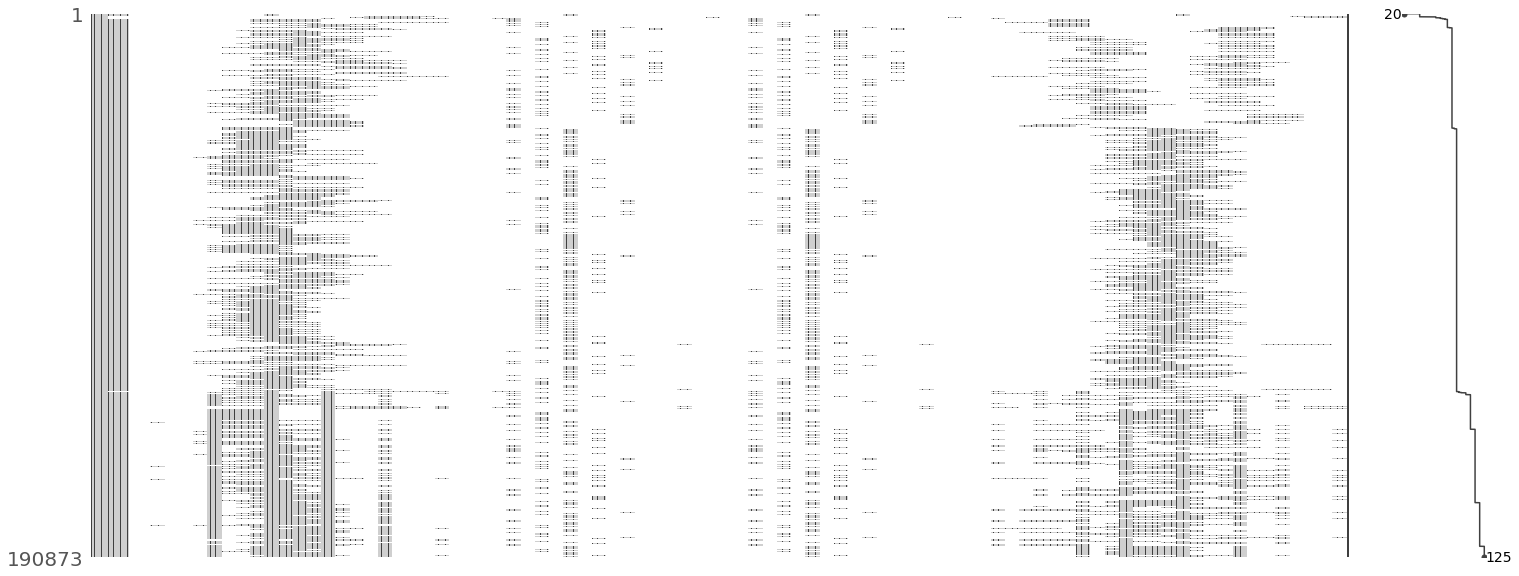

In [499]:
data['count'] = data.count(axis=1)
msno.matrix(data.sort_values('count'))

In [10]:
data_nodups = data.drop(['Id', 'DateAdded'], axis=1).drop_duplicates()
data_nodups.shape

(3459, 527)

In [489]:
data_nodups.EventId.nunique()

391

In [23]:
data.describe()

,Id,EventId,HOME,DRAW,AWAY,HOME_computed_,DRAW_computed_,AWAY_computed_,HOME_disc,DRAW_disc,AWAY_disc,HOMEAWAY,HOMEDRAW,DRAWAWAY,HOMEAWAY_computed_,HOMEDRAW_computed_,DRAWAWAY_computed_,HOMEAWAY_disc,HOMEDRAW_disc,DRAWAWAY_disc,TO_0_5,TU_0_5,TO_0_5_computed_,TU_0_5_computed_,TO_0_5_disc,TU_0_5_disc,TO_0_75,TU_0_75,TO_0_75_computed_,TU_0_75_computed_,TO_0_75_disc,TU_0_75_disc,TO_1_0,TU_1_0,TO_1_0_computed_,TU_1_0_computed_,TO_1_0_disc,TU_1_0_disc,TO_1_25,TU_1_25,TO_1_25_computed_,TU_1_25_computed_,TO_1_25_disc,TU_1_25_disc,TO_1_5,TU_1_5,TO_1_5_computed_,TU_1_5_computed_,TO_1_5_disc,TU_1_5_disc,...,"HOME_HDP -1,25_disc","AWAY_HDP 1,25_disc","HOME_HDP -1,5","AWAY_HDP 1,5","HOME_HDP -1,5_computed_","AWAY_HDP 1,5_computed_","HOME_HDP -1,5_disc","AWAY_HDP 1,5_disc","HOME_HDP -2,0","AWAY_HDP 2,0","HOME_HDP -2,0_computed_","AWAY_HDP 2,0_computed_","HOME_HDP -2,0_disc","AWAY_HDP 2,0_disc","HOME_HDP -2,25","AWAY_HDP 2,25","HOME_HDP -2,25_computed_","AWAY_HDP 2,25_computed_","HOME_HDP -2,25_disc","AWAY_HDP 2,25_disc","HOME_HDP -2,5","AWAY_HDP 2,5","HOME_HDP -2,5_computed_","AWAY_HDP 2,5_computed_","HOME_HDP -2,5_disc","AWAY_HDP 2,5_disc","HOME_HDP -2,75","AWAY_HDP 2,75","HOME_HDP -2,75_computed_","AWAY_HDP 2,75_computed_","HOME_HDP -2,75_disc","AWAY_HDP 2,75_disc","HOME_HDP -3,0","AWAY_HDP 3,0","HOME_HDP -3,0_computed_","AWAY_HDP 3,0_computed_","HOME_HDP -3,0_disc","AWAY_HDP 3,0_disc","HOME_HDP -3,25","AWAY_HDP 3,25","HOME_HDP -3,25_computed_","AWAY_HDP 3,25_computed_","HOME_HDP -3,25_disc","AWAY_HDP 3,25_disc","HOME_HDP -3,5","AWAY_HDP 3,5","HOME_HDP -3,5_computed_","AWAY_HDP 3,5_computed_","HOME_HDP -3,5_disc","AWAY_HDP 3,5_disc"
count,190873.000000,1.908730e+05,189473.000000,189473.000000,189473.000000,189473.000000,189473.000000,189473.000000,1.894730e+05,189473.000000,189473.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,70894.000000,70894.000000,70894.000000,70894.000000,7.089400e+04,7.089400e+04,...,54677.000000,54677.000000,60868.000000,60868.000000,60868.000000,60868.000000,60868.000000,60868.000000,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,11230.000000,18049.000000,18049.000000,18049.000000,18049.000000,18049.000000,1.804900e+04,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000
mean,465262.518790,1.063116e+09,3.396798,4.295487,4.599002,3.637272,4.895030,4.946696,9.482763e-03,0.016445,0.011729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.113232,6.751704,1.165519,7.063907,0.000073,0.000073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375280,3.023689,1.456568,3.197071,0.006563,0.006562,1.320439,3.755008,1.401549,3.960615,2.286343e-03,2.286465e-03,...,0.012764,0.012764,3.218377,1.590312,3.343952,1.697771,0.007090,0.007090,2.295693,1.655135,2.408614,1.748276,0.007142,0.007142,2.358881,1.649307,2.478180,1.739052,0.006179,0.006179,3.866714,1.396938,4.030725,1.477349,0.003580,3.579736e-03,2.185712,1.772821,2.271622,1.869766,0.006403,0.006403,1.774678,2.171147,1.865204,2.278631,0.006247,0.006247,1.977686,1.920018,2.064876,2.022145,0.005126,0.005126,5.107687,1.315411,5.356484,1.382356,0.000518,0.000517
std,66833.379042,2.404059e+06,3.846572,1.679085,4.926913,4.765120,2.281667,7.536001,9.653778e-03,0.013136,0.012611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012008,0.371990,0.009961,0.371347,0.000002,0.000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017128,0.070396,0.026602,0.117053,0.008202,0.008202,0.147902,1.155639,0.161025,1.241388,6.572954e-03,6.572869e-03,...,0.012262,0.012262,1.561205,0.497782,1.648159,0.590672,0

In [18]:
# get all input_columns
input_cols = [
    col for col in data.columns.tolist() 
    if 'computed' not in col and 'disc' not in col
]

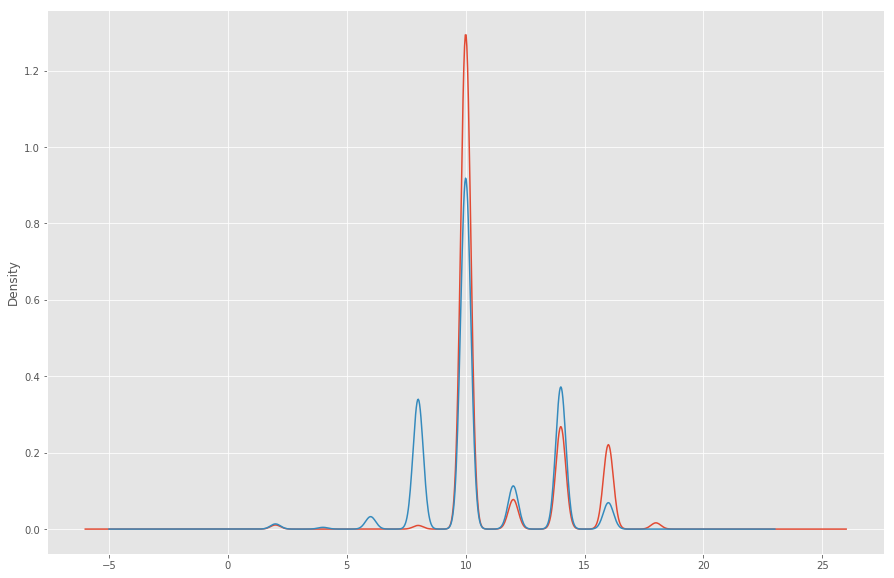

In [244]:
plt.figure(figsize=(15, 10))
data.loc[:, total_columns].count(axis=1).plot(kind='kde')
data.loc[:, hdp_columns].count(axis=1).plot(kind='kde')
plt.show()

In [18]:
from operator_position.odds import margin_2

In [19]:
def margin_3(odd_1, odd_2, odd_3):
    return (1/odd_1 + 1/odd_2 + 1/odd_3 - 1)/(1/odd_1 + 1/odd_2 + 1/odd_3)

In [21]:
margin_3(*get_input_params(data.loc[0, ['HOME', 'DRAW', 'AWAY']]))

0.06019427343813161

In [22]:
margin_2(*data.loc[0, ['TO_2_5', 'TU_2_5']])

0.05381752390798655

In [32]:
check_margin = pd.concat([data_ml, data_hdp], axis=1)
check_margin_0_5_home = check_margin[check_margin['HOME_HDP -0,5'].notnull()] 
check_margin_0_5_away = check_margin[check_margin['AWAY_HDP -0,5'].notnull()]

In [33]:
check_margin_0_5_home.head(1)

,HOME,DRAW,AWAY,margin,HOME_fair,DRAW_fair,AWAY_fair,margin_fair,"HOME_HDP 3,5","AWAY_HDP -3,5","HOME_HDP 3,0","AWAY_HDP -3,0","HOME_HDP 2,75","AWAY_HDP -2,75","HOME_HDP 2,5","AWAY_HDP -2,5","HOME_HDP 2,0","AWAY_HDP -2,0","HOME_HDP 1,75","AWAY_HDP -1,75","HOME_HDP 1,5","AWAY_HDP -1,5","HOME_HDP 1,0","AWAY_HDP -1,0","HOME_HDP 0,75","AWAY_HDP -0,75","HOME_HDP 0,5","AWAY_HDP -0,5","HOME_HDP 0,25","AWAY_HDP -0,25","HOME_HDP 0,0","AWAY_HDP 0,0","HOME_HDP -0,25","AWAY_HDP 0,25","HOME_HDP -0,5","AWAY_HDP 0,5","HOME_HDP -0,75","AWAY_HDP 0,75","HOME_HDP -1,0","AWAY_HDP 1,0","HOME_HDP -1,25","AWAY_HDP 1,25","HOME_HDP -1,5","AWAY_HDP 1,5","HOME_HDP -2,0","AWAY_HDP 2,0","HOME_HDP -2,25","AWAY_HDP 2,25","HOME_HDP -2,5","AWAY_HDP 2,5","HOME_HDP -2,75","AWAY_HDP 2,75","HOME_HDP -3,0","AWAY_HDP 3,0","HOME_HDP -3,25","AWAY_HDP 3,25","HOME_HDP -3,5","AWAY_HDP 3,5","margin_HDP 3,5","margin_HDP 3,0","margin_HDP 2,75","margin_HDP 2,5","margin_HDP 2,0","margin_HDP 1,75","margin_HDP 1,5","margin_HDP 1,0","margin_HDP 0,75","margin_HDP 0,5","margin_HDP 0,25","margin_HDP 0,0","margin_HDP -0,25","margin_HDP -0,5","margin_HDP -0,75","margin_HDP -1,0","margin_HDP -1,25","margin_HDP -1,5","margin_HDP -2,0","margin_HDP -2,25","margin_HDP -2,5","margin_HDP -2,75","margin_HDP -3,0","margin_HDP -3,25","margin_HDP -3,5","HOME_HDP 3,5_fair","AWAY_HDP -3,5_fair","HOME_HDP 3,0_fair","AWAY_HDP -3,0_fair","HOME_HDP 2,75_fair","AWAY_HDP -2,75_fair","HOME_HDP 2,5_fair","AWAY_HDP -2,5_fair","HOME_HDP 2,0_fair","AWAY_HDP -2,0_fair","HOME_HDP 1,75_fair","AWAY_HDP -1,75_fair","HOME_HDP 1,5_fair","AWAY_HDP -1,5_fair","HOME_HDP 1,0_fair","AWAY_HDP -1,0_fair","HOME_HDP 0,75_fair","AWAY_HDP -0,75_fair","HOME_HDP 0,5_fair","AWAY_HDP -0,5_fair","HOME_HDP 0,25_fair","AWAY_HDP -0,25_fair","HOME_HDP 0,0_fair","AWAY_HDP 0,0_fair","HOME_HDP -0,25_fair","AWAY_HDP 0,25_fair","HOME_HDP -0,5_fair","AWAY_HDP 0,5_fair","HOME_HDP -0,75_fair","AWAY_HDP 0,75_fair","HOME_HDP -1,0_fair","AWAY_HDP 1,0_fair","HOME_HDP -1,25_fair","AWAY_HDP 1,25_fair","HOME_HDP -1,5_fair","AWAY_HDP 1,5_fair","HOME_HDP -2,0_fair","AWAY_HDP 2,0_fair","HOME_HDP -2,25_fair","AWAY_HDP 2,25_fair","HOME_HDP -2,5_fair","AWAY_HDP 2,5_fair","HOME_HDP -2,75_fair","AWAY_HDP 2,75_fair","HOME_HDP -3,0_fair","AWAY_HDP 3,0_fair","HOME_HDP -3,25_fair","AWAY_HDP 3,25_fair","HOME_HDP -3,5_fair","AWAY_HDP 3,5_fair"
0,1.813,3.74,4.08,0.060194,1.929122,3.979546,4.341323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.349,3.11,1.578,2.36,1.813,2.0,2.06,1.757,2.48,1.526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059119,0.054322,0.049043,0.051763,0.055297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.433762,3.305411,1.668644,2.495564,1.9065,2.103144,2.172453,1.852913,2.625164,1.615323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
(margin_diff < 0.005).value_counts()

False    2126
True     1858
dtype: int64

In [42]:
home_margin_diff = check_margin_0_5_home['margin'] - check_margin_0_5_home['margin_HDP -0,5']
away_margin_diff = check_margin_0_5_away['margin'] - check_margin_0_5_away['margin_HDP -0,5']
margin_diff = pd.concat([home_margin_diff, away_margin_diff])

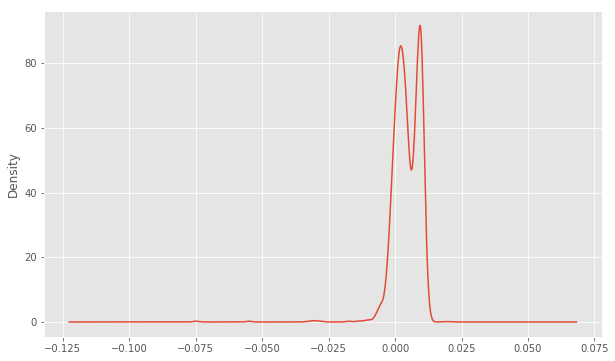

In [43]:
margin_diff = pd.concat([home_margin_diff, away_margin_diff])
plt.figure(figsize=(10,6))
margin_diff.plot('kde')

## Check only ML odds (1, X, 2)

In [11]:
ml_columns = ['HOME', 'DRAW', 'AWAY']
ml_columns_fair = ['HOME_fair', 'DRAW_fair', 'AWAY_fair']

In [12]:
def margin_2(odd_1, odd_2):
    return 1 - ((odd_1 * odd_2)/(odd_1 + odd_2))

def margin_3(odd_1, odd_2, odd_3):
    return (1/odd_1 + 1/odd_2 + 1/odd_3 - 1)/(1/odd_1 + 1/odd_2 + 1/odd_3)

def fair_odd(odd, margin):
    return odd / (1 - margin)

In [13]:
not_empty_ml = (
    data_nodups
    .loc[:, ml_columns]
    .notnull()
    .any(axis=1)
)

data_ml = data_nodups.loc[not_empty_ml, ml_columns].copy()

In [14]:
# margin
data_ml['margin'] = data_ml.loc[:, ml_columns].apply(lambda x: margin_3(*x), axis=1)

In [15]:
# fair odds
data_ml['HOME_fair'] = fair_odd(data_ml['HOME'], data_ml['margin'])
data_ml['DRAW_fair'] = fair_odd(data_ml['DRAW'], data_ml['margin'])
data_ml['AWAY_fair'] = fair_odd(data_ml['AWAY'], data_ml['margin'])
data_ml['margin_fair'] = data_ml.loc[:, ml_columns_fair].apply(lambda x: margin_3(*x), axis=1)

In [16]:
data_ml

,HOME,DRAW,AWAY,margin,HOME_fair,DRAW_fair,AWAY_fair,margin_fair
0,1.813,3.74,4.080,0.060194,1.929122,3.979546,4.341323,0.000000e+00
1,17.470,8.87,1.120,0.059123,18.567775,9.427370,1.190378,-1.110223e-16
2,2.140,3.33,3.530,0.048413,2.248875,3.499418,3.709593,2.220446e-16
3,2.360,3.13,3.150,0.057207,2.503200,3.319922,3.341136,0.000000e+00
5,1.367,4.58,7.850,0.071717,1.472612,4.933842,8.456476,-1.110223e-16
6,2.350,2.99,3.440,0.048233,2.469093,3.141526,3.614331,0.000000e+00
7,1.826,3.34,4.870,0.049778,1.921655,3.514966,5.125116,-1.110223e-16
8,7.930,6.16,1.288,0.060891,8.444170,6.559406,1.371512,0.000000e+00
9,1.154,6.91,14.710,0.073431,1.245454,7.457617,15.875766,0.000000e+00
10,2.290,3.31,3.210,0.047911,2.405239,3.476567,3.371535,0.000000e+00


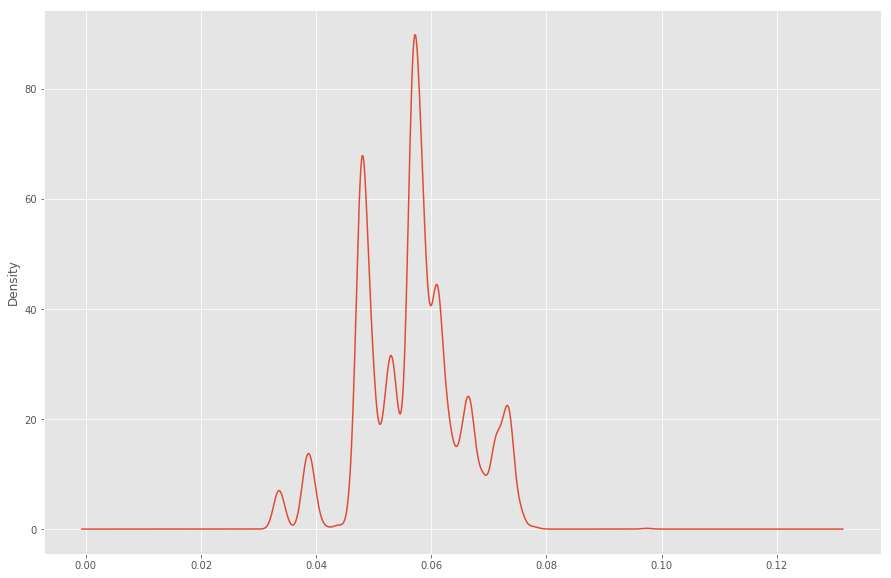

In [46]:
# margin distribution
plt.figure(figsize=(15,10))
data_ml['margin'].plot(kind='kde')

## Check TL

In [148]:
total_columns = [col for col in input_cols if 'TO' in col or 'TU' in col]
total_columns_fair = [col + '_fair' for col in total_columns]

In [60]:
data.loc[:10, total_columns]

,TO_0_5,TU_0_5,TO_0_75,TU_0_75,TO_1_0,TU_1_0,TO_1_25,TU_1_25,TO_1_5,TU_1_5,TO_1_75,TU_1_75,TO_2_0,TU_2_0,TO_2_25,TU_2_25,TO_2_5,TU_2_5,TO_2_75,TU_2_75,TO_3_0,TU_3_0,TO_3_25,TU_3_25,TO_3_5,TU_3_5,TO_3_75,TU_3_75,TO_4_0,TU_4_0,TO_4_25,TU_4_25,TO_4_5,TU_4_5,TO_4_75,TU_4_75,TO_5_0,TU_5_0,TO_5_25,TU_5_25,TO_5_5,TU_5_5,TO_5_75,TU_5_75,TO_6_0,TU_6_0,TO_6_25,TU_6_25,TO_6_5,TU_6_5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.456,2.680,1.649,2.220,1.833,1.980,2.100,1.724,2.400,1.558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.581,2.380,1.751,2.080,1.961,1.869,2.26,1.641,2.560,1.507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.462,2.69,1.621,2.290,1.925,1.909,2.200,1.675,2.610,1.490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.467,2.61,1.641,2.210,1.961,1.847,2.240,1.625,2.660,1.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.625,2.270,1.8,2.01,2.0,1.826,2.27,1.621,2.53,1.505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.358,3.070,1.574,2.360,1.800,2.010,2.040,1.775,2.450,1.537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.497,2.52,1.653,2.19,1.943,1.884,2.260,1.617,2.590,1.471,NaN,NaN,NaN,NaN,NaN,NaN,5.150,1.141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.444,2.76,1.568,2.41,1.775,2.060,2.080,1.757,2.380,1.581,NaN,NaN,NaN,NaN,NaN,NaN,4.670,1.182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.571,2.400,1.751,2.080,1.943,1.892,2.20,1.675,2.470,1.543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.526,2.480,1.684,2.160,1.952,1.862,2.190,1.666,2.530,1.507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
data_totals = data.loc[:, total_columns].copy()

In [67]:
#find all half total
data.loc[0, total_columns].T[data.loc[0, total_columns].notnull()]

TO_2_25    1.456
TU_2_25     2.68
TO_2_5     1.649
TU_2_5      2.22
TO_2_75    1.833
TU_2_75     1.98
TO_3_0       2.1
TU_3_0     1.724
TO_3_25      2.4
TU_3_25    1.558
Name: 0, dtype: object

In [424]:
# margin for all totals
totals = list(zip(total_columns[::2], total_columns[1::2]))
margin_columns = []
for to, tu in totals:
    tl_value = float('.'.join(to.split('_')[1:]))
    margin_column = 'margin' + to[2:]
    margin_columns.append(margin_column)
    data_totals[margin_column] = margin_2(data_totals[to], data_totals[tu])

In [154]:
# fair odds for all totals
for col_new, col in zip(total_columns_fair, total_columns):
    margin_column = 'margin' + col[2:]
    data_totals[col_new] = fair_odd(data_totals[col], data_totals[margin_column])

In [155]:
data_totals.head()

,TO_0_5,TU_0_5,TO_0_75,TU_0_75,TO_1_0,TU_1_0,TO_1_25,TU_1_25,TO_1_5,TU_1_5,TO_1_75,TU_1_75,TO_2_0,TU_2_0,TO_2_25,TU_2_25,TO_2_5,TU_2_5,TO_2_75,TU_2_75,TO_3_0,TU_3_0,TO_3_25,TU_3_25,TO_3_5,TU_3_5,TO_3_75,TU_3_75,TO_4_0,TU_4_0,TO_4_25,TU_4_25,TO_4_5,TU_4_5,TO_4_75,TU_4_75,TO_5_0,TU_5_0,TO_5_25,TU_5_25,TO_5_5,TU_5_5,TO_5_75,TU_5_75,TO_6_0,TU_6_0,TO_6_25,TU_6_25,TO_6_5,TU_6_5,...,TO_0_5_fair,TU_0_5_fair,TO_0_75_fair,TU_0_75_fair,TO_1_0_fair,TU_1_0_fair,TO_1_25_fair,TU_1_25_fair,TO_1_5_fair,TU_1_5_fair,TO_1_75_fair,TU_1_75_fair,TO_2_0_fair,TU_2_0_fair,TO_2_25_fair,TU_2_25_fair,TO_2_5_fair,TU_2_5_fair,TO_2_75_fair,TU_2_75_fair,TO_3_0_fair,TU_3_0_fair,TO_3_25_fair,TU_3_25_fair,TO_3_5_fair,TU_3_5_fair,TO_3_75_fair,TU_3_75_fair,TO_4_0_fair,TU_4_0_fair,TO_4_25_fair,TU_4_25_fair,TO_4_5_fair,TU_4_5_fair,TO_4_75_fair,TU_4_75_fair,TO_5_0_fair,TU_5_0_fair,TO_5_25_fair,TU_5_25_fair,TO_5_5_fair,TU_5_5_fair,TO_5_75_fair,TU_5_75_fair,TO_6_0_fair,TU_6_0_fair,TO_6_25_fair,TU_6_25_fair,TO_6_5_fair,TU_6_5_fair
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.456,2.680,1.649,2.220,1.833,1.98,2.1,1.724,2.400,1.558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.543284,2.840659,1.742793,2.346270,1.925758,2.080196,2.218097,1.820952,2.540436,1.649167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.581,2.380,1.751,2.08,1.961,1.869,2.26,1.641,2.560,1.507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.664286,2.505376,1.841827,2.187893,2.049224,1.953085,2.377209,1.726106,2.698739,1.588672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.462,2.69,1.621,2.29,1.925,1.909,2.200,1.675,2.610,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.543494,2.839945,1.707860,2.412708,2.008381,1.991688,2.313433,1.761364,2.751678,1.570881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.467,2.61,1.641,2.21,1.961,1.847,2.240,1.625,2.660,1.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.562069,2.779141,1.742534,2.346740,2.061722,1.941866,2.378462,1.725446,2.834483,1.545113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.625,2.270,1.8,2.01,2.0,1.826,2.27,1.621,2.53,1.505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.715859,2.396923,1.895522,2.116667,2.09529,1.913,2.40037,1.714097,2.681063,1.594862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


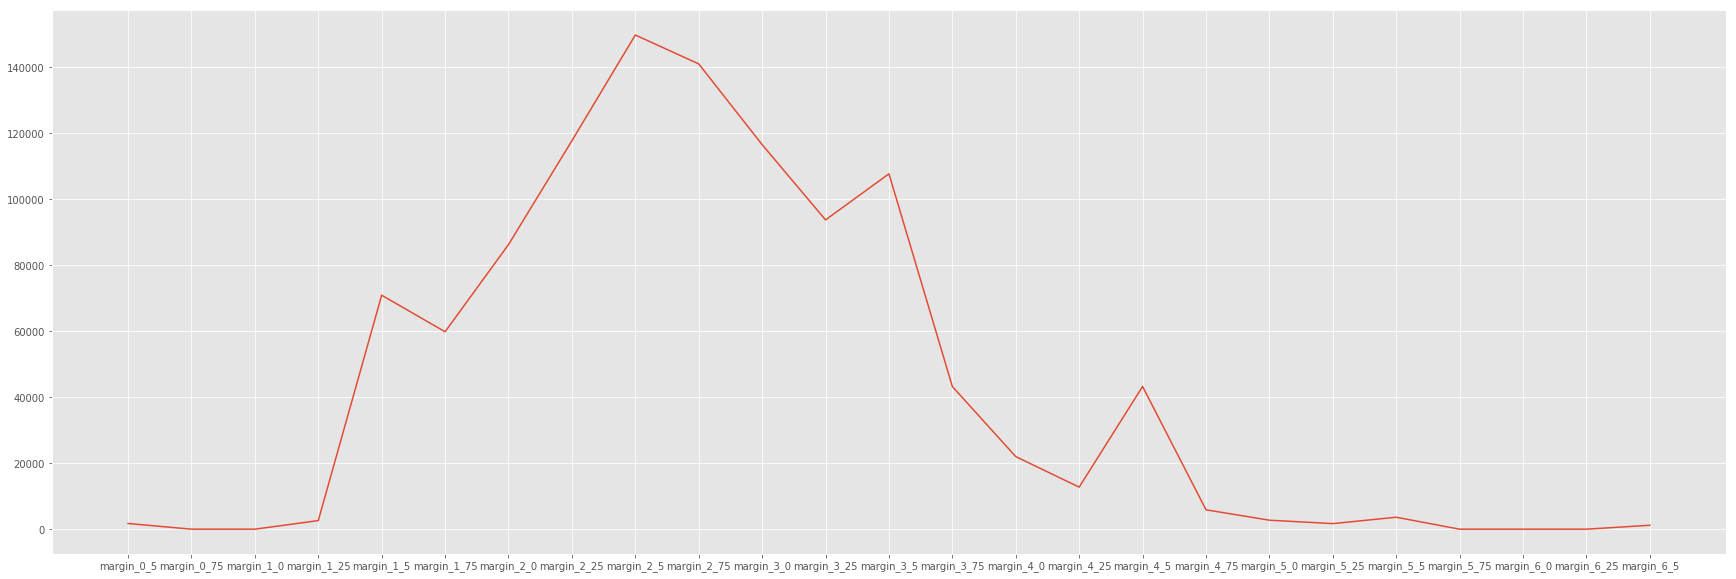

In [147]:
# not empty input total columns distribution
plt.figure(figsize=(30,10))
plt.plot(data_totals.loc[:, margin_columns].count())
plt.show()

In [ ]:
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


init_notebook_mode(connected=True)

fig = ff.create_distplot(
    [data_totals[data_totals[c].notnull()][c] for c in not_empty_margin[:5]],
    not_empty_margin[:5]
)
fig.show()

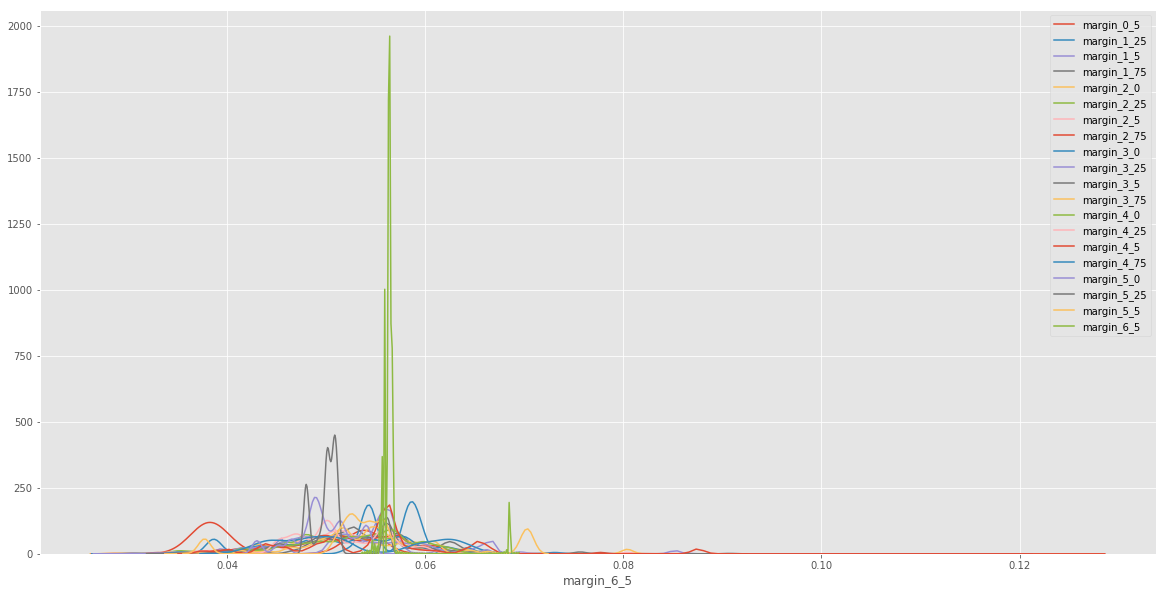

In [130]:
plt.figure(figsize=(20,10))

not_empty_totals = (data_totals.loc[:, margin_columns].count() != 0).reset_index()
not_empty_margin = not_empty_totals.loc[not_empty_totals[0], 'index'].tolist()

for x in not_empty_margin:
    sns.distplot(
        data_totals.loc[data_totals[x].notnull(), x],
        hist=False, 
        kde_kws={"label": x},
    )
plt.show()

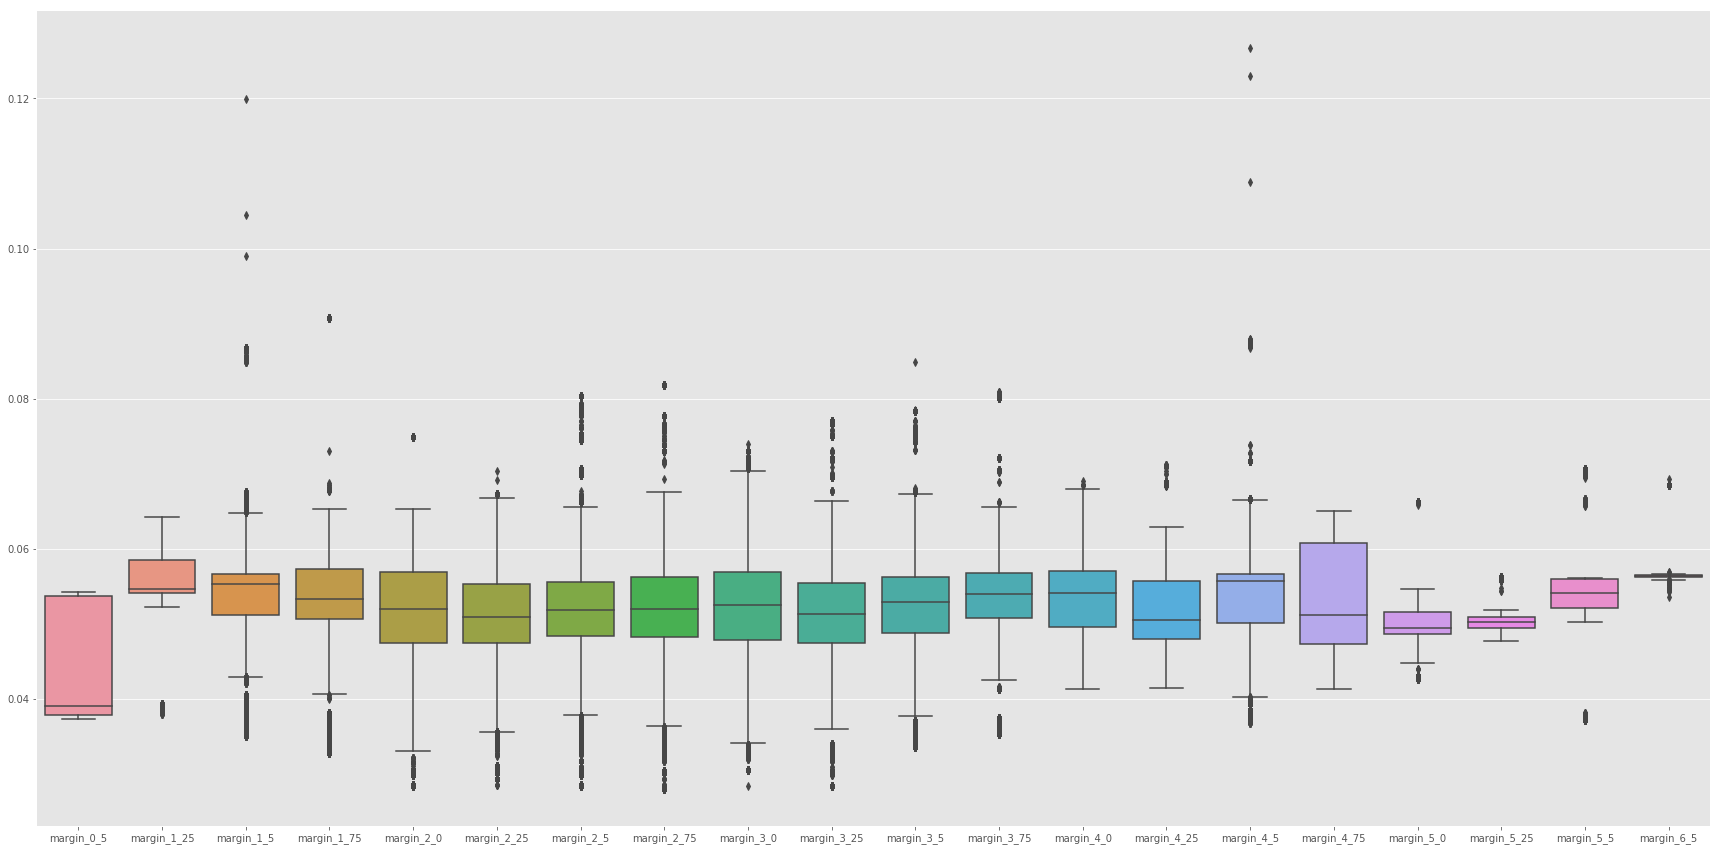

In [427]:
plt.figure(figsize=(30, 15))
not_empty_totals = (data_totals.loc[:, margin_columns].count() != 0).reset_index()
not_empty_margin = not_empty_totals.loc[not_empty_totals[0], 'index'].tolist()
sns.boxplot(data=data_totals.loc[:, not_empty_margin], orient='v')

- ### Comparison 0.0, 0.25, 0.5, 0.75 totals

In [157]:
# margin for all totals
totals = list(zip(total_columns[::2], total_columns[1::2]))

totals_types = {
    'totals_0': [],
    'totals_25': [],
    'totals_5': [],
    'totals_75': [],
}

for to, tu in totals:
    tl_value = to.split('_')[2]
    totals_types['totals_' + tl_value].append((to, tu))

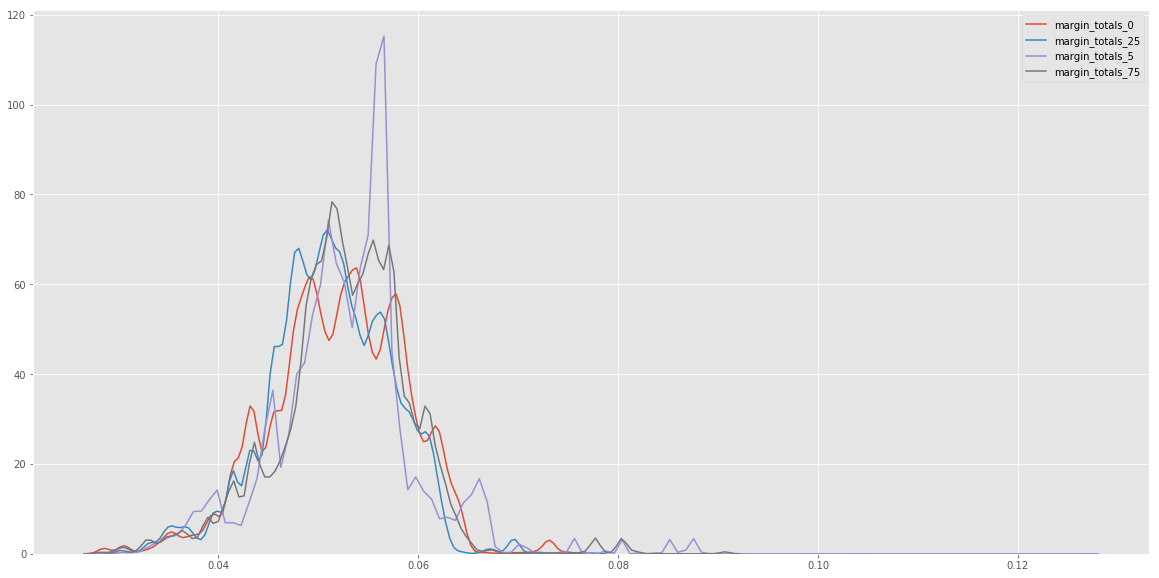

In [166]:
# stack margins
plt.figure(figsize=(20,10))

for k, totals in totals_types.items():
    # stack margins of k value
    margins_concat = []
    for to, tu in totals:
        tl_value = float('.'.join(to.split('_')[1:]))
        margin_column = 'margin' + to[2:]
        margins_concat.append(
            data_totals[
                data_totals[margin_column].notnull()
            ][margin_column].values
        )
        
    margins_all = hstack(margins_concat)
    
    sns.distplot(
        margins_all,
        hist=False, 
        kde_kws={"label": 'margin_' + k},
    )
plt.show()

## Check HDP

In [19]:
hdp_columns = [col for col in input_cols if 'HDP' in col]
hdp_columns_fair = [col + '_fair' for col in hdp_columns]

In [20]:
data_nodups.loc[:, hdp_columns].head(10)

,"HOME_HDP 3,5","AWAY_HDP -3,5","HOME_HDP 3,0","AWAY_HDP -3,0","HOME_HDP 2,75","AWAY_HDP -2,75","HOME_HDP 2,5","AWAY_HDP -2,5","HOME_HDP 2,0","AWAY_HDP -2,0","HOME_HDP 1,75","AWAY_HDP -1,75","HOME_HDP 1,5","AWAY_HDP -1,5","HOME_HDP 1,0","AWAY_HDP -1,0","HOME_HDP 0,75","AWAY_HDP -0,75","HOME_HDP 0,5","AWAY_HDP -0,5","HOME_HDP 0,25","AWAY_HDP -0,25","HOME_HDP 0,0","AWAY_HDP 0,0","HOME_HDP -0,25","AWAY_HDP 0,25","HOME_HDP -0,5","AWAY_HDP 0,5","HOME_HDP -0,75","AWAY_HDP 0,75","HOME_HDP -1,0","AWAY_HDP 1,0","HOME_HDP -1,25","AWAY_HDP 1,25","HOME_HDP -1,5","AWAY_HDP 1,5","HOME_HDP -2,0","AWAY_HDP 2,0","HOME_HDP -2,25","AWAY_HDP 2,25","HOME_HDP -2,5","AWAY_HDP 2,5","HOME_HDP -2,75","AWAY_HDP 2,75","HOME_HDP -3,0","AWAY_HDP 3,0","HOME_HDP -3,25","AWAY_HDP 3,25","HOME_HDP -3,5","AWAY_HDP 3,5"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.349,3.11,1.578,2.360,1.813,2.000,2.060,1.757,2.480,1.526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.584,2.4,1.735,2.13,2.300,1.632,2.650,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383,3.04,1.523,2.55,1.840,2.010,2.140,1.729,2.590,1.507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.442,2.68,1.636,2.22,2.010,1.800,2.350,1.571,2.890,1.386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.606,2.33,1.757,2.08,1.99,1.854,2.19,1.68
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.476,2.610,1.662,2.200,1.99,1.826,2.300,1.609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.305,3.42,1.408,2.89,1.591,2.35,1.990,1.854,2.340,1.598,2.930,1.398,NaN,NaN,NaN,NaN,5.650,1.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.179,4.87,NaN,NaN,1.298,3.54,1.558,2.460,1.826,2.020,2.140,1.729,2.810,1.440,NaN,NaN,3.860,1.258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.598,2.370,1.806,2.04,2.02,1.833,2.86,1.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.546,2.430,1.9,1.917,2.15,1.689,2.41,1.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data_hdp = data_nodups.loc[:, hdp_columns].copy()

In [22]:
# margin for all handicaps
hdps = list(zip(hdp_columns[::2], hdp_columns[1::2]))
margin_columns = []
for home, away in hdps:
    tl_value = float(home.split(' ')[1].replace(',','.'))
    margin_column = 'margin' + home[4:]
    margin_columns.append(margin_column)
    data_hdp[margin_column] = margin_2(data_hdp[home], data_hdp[away])

In [23]:
# fair odds for all handicaps
import itertools

margin_res = list(itertools.chain.from_iterable(itertools.repeat(i, 2) for i in margin_columns))

for col_new, col, margin_column in zip(hdp_columns_fair, hdp_columns, margin_res):
    data_hdp[col_new] = fair_odd(data_hdp[col], data_hdp[margin_column])

In [24]:
data_hdp.head(10)

,"HOME_HDP 3,5","AWAY_HDP -3,5","HOME_HDP 3,0","AWAY_HDP -3,0","HOME_HDP 2,75","AWAY_HDP -2,75","HOME_HDP 2,5","AWAY_HDP -2,5","HOME_HDP 2,0","AWAY_HDP -2,0","HOME_HDP 1,75","AWAY_HDP -1,75","HOME_HDP 1,5","AWAY_HDP -1,5","HOME_HDP 1,0","AWAY_HDP -1,0","HOME_HDP 0,75","AWAY_HDP -0,75","HOME_HDP 0,5","AWAY_HDP -0,5","HOME_HDP 0,25","AWAY_HDP -0,25","HOME_HDP 0,0","AWAY_HDP 0,0","HOME_HDP -0,25","AWAY_HDP 0,25","HOME_HDP -0,5","AWAY_HDP 0,5","HOME_HDP -0,75","AWAY_HDP 0,75","HOME_HDP -1,0","AWAY_HDP 1,0","HOME_HDP -1,25","AWAY_HDP 1,25","HOME_HDP -1,5","AWAY_HDP 1,5","HOME_HDP -2,0","AWAY_HDP 2,0","HOME_HDP -2,25","AWAY_HDP 2,25","HOME_HDP -2,5","AWAY_HDP 2,5","HOME_HDP -2,75","AWAY_HDP 2,75","HOME_HDP -3,0","AWAY_HDP 3,0","HOME_HDP -3,25","AWAY_HDP 3,25","HOME_HDP -3,5","AWAY_HDP 3,5","margin_HDP 3,5","margin_HDP 3,0","margin_HDP 2,75","margin_HDP 2,5","margin_HDP 2,0","margin_HDP 1,75","margin_HDP 1,5","margin_HDP 1,0","margin_HDP 0,75","margin_HDP 0,5","margin_HDP 0,25","margin_HDP 0,0","margin_HDP -0,25","margin_HDP -0,5","margin_HDP -0,75","margin_HDP -1,0","margin_HDP -1,25","margin_HDP -1,5","margin_HDP -2,0","margin_HDP -2,25","margin_HDP -2,5","margin_HDP -2,75","margin_HDP -3,0","margin_HDP -3,25","margin_HDP -3,5","HOME_HDP 3,5_fair","AWAY_HDP -3,5_fair","HOME_HDP 3,0_fair","AWAY_HDP -3,0_fair","HOME_HDP 2,75_fair","AWAY_HDP -2,75_fair","HOME_HDP 2,5_fair","AWAY_HDP -2,5_fair","HOME_HDP 2,0_fair","AWAY_HDP -2,0_fair","HOME_HDP 1,75_fair","AWAY_HDP -1,75_fair","HOME_HDP 1,5_fair","AWAY_HDP -1,5_fair","HOME_HDP 1,0_fair","AWAY_HDP -1,0_fair","HOME_HDP 0,75_fair","AWAY_HDP -0,75_fair","HOME_HDP 0,5_fair","AWAY_HDP -0,5_fair","HOME_HDP 0,25_fair","AWAY_HDP -0,25_fair","HOME_HDP 0,0_fair","AWAY_HDP 0,0_fair","HOME_HDP -0,25_fair","AWAY_HDP 0,25_fair","HOME_HDP -0,5_fair","AWAY_HDP 0,5_fair","HOME_HDP -0,75_fair","AWAY_HDP 0,75_fair","HOME_HDP -1,0_fair","AWAY_HDP 1,0_fair","HOME_HDP -1,25_fair","AWAY_HDP 1,25_fair","HOME_HDP -1,5_fair","AWAY_HDP 1,5_fair","HOME_HDP -2,0_fair","AWAY_HDP 2,0_fair","HOME_HDP -2,25_fair","AWAY_HDP 2,25_fair","HOME_HDP -2,5_fair","AWAY_HDP 2,5_fair","HOME_HDP -2,75_fair","AWAY_HDP 2,75_fair","HOME_HDP -3,0_fair","AWAY_HDP 3,0_fair","HOME_HDP -3,25_fair","AWAY_HDP 3,25_fair","HOME_HDP -3,5_fair","AWAY_HDP 3,5_fair"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.349,3.11,1.578,2.360,1.813,2.000,2.060,1.757,2.480,1.526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059119,0.054322,0.049043,0.051763,0.055297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.433762,3.305411,1.668644,2.495564,1.906500,2.103144,2.172453,1.852913,2.625164,1.615323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.584,2.4,1.735,2.13,2.300,1.632,2.650,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045783,0.043842,0.045371,0.046256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.66,2.515152,1.814554,2.227666,2.409314,1.709565,2.778523,1.562264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383,3.04,1.523,2.55,1.840,2.010,2.140,1.729,2.590,1.507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049442,0.046489,0.039377,0.043665,0.047320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.454934,3.198120,1.597255,2.674327,1.915423,2.092391,2.237710,1.807944,2.718646,1.581853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

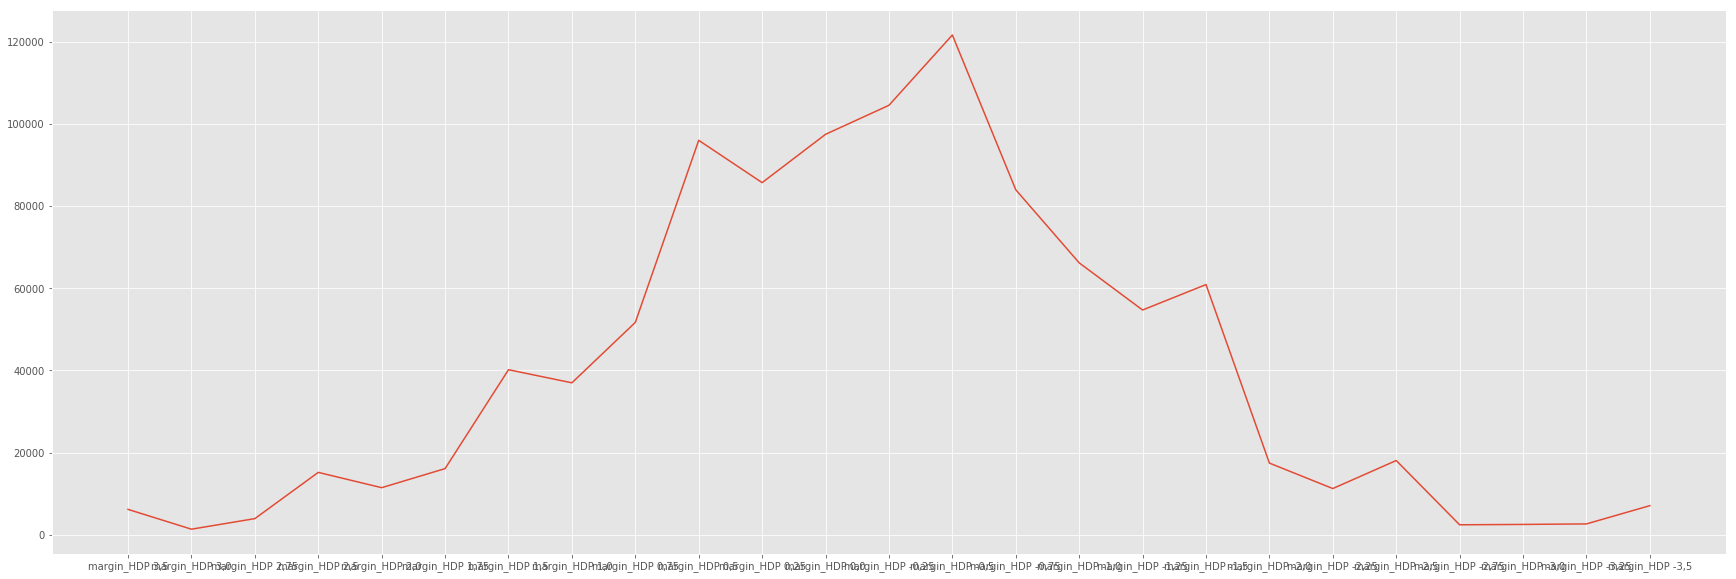

In [187]:
# not empty input hdp columns distribution
plt.figure(figsize=(30,10))
plt.plot(data_hdp.loc[:, margin_columns].count())
plt.show()

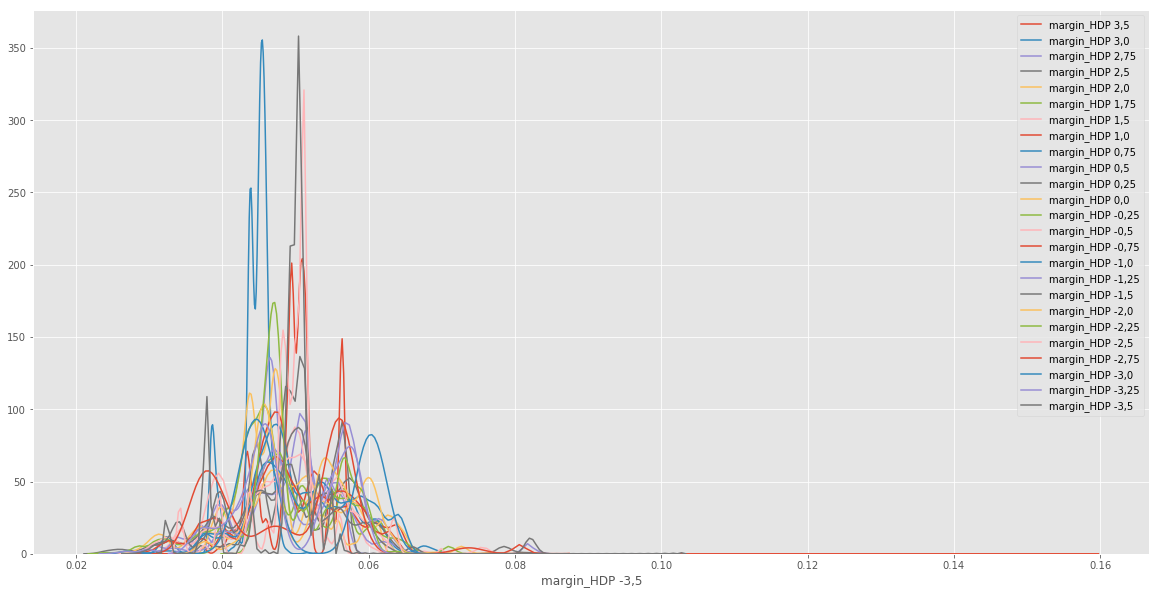

In [437]:
plt.figure(figsize=(20,10))

not_empty_totals = (data_hdp.loc[:, margin_columns].count() != 0).reset_index()
not_empty_margin = not_empty_totals.loc[not_empty_totals[0], 'index'].tolist()

for x in not_empty_margin:
    sns.distplot(
        data_hdp.loc[data_hdp[x].notnull(), x],
        hist=False, 
        kde_kws={"label": x},
    )
plt.show()

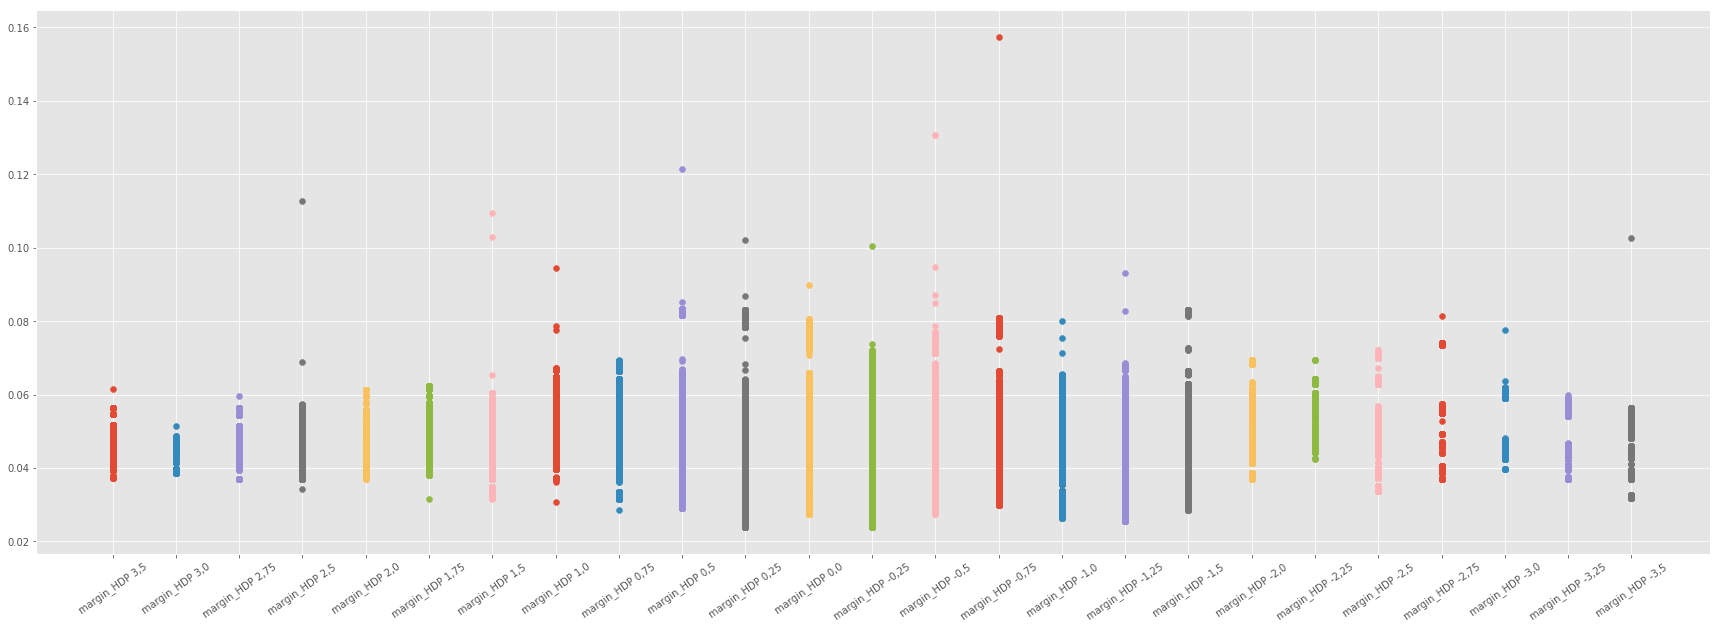

In [440]:
plt.figure(figsize=(30, 10))
for x in not_empty_margin:
    y_margin = data_hdp.loc[data_hdp[x].notnull(), x]
    plt.scatter(x=np.repeat(x, y_margin.shape[0]), y=y_margin)
plt.xticks(rotation=35)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

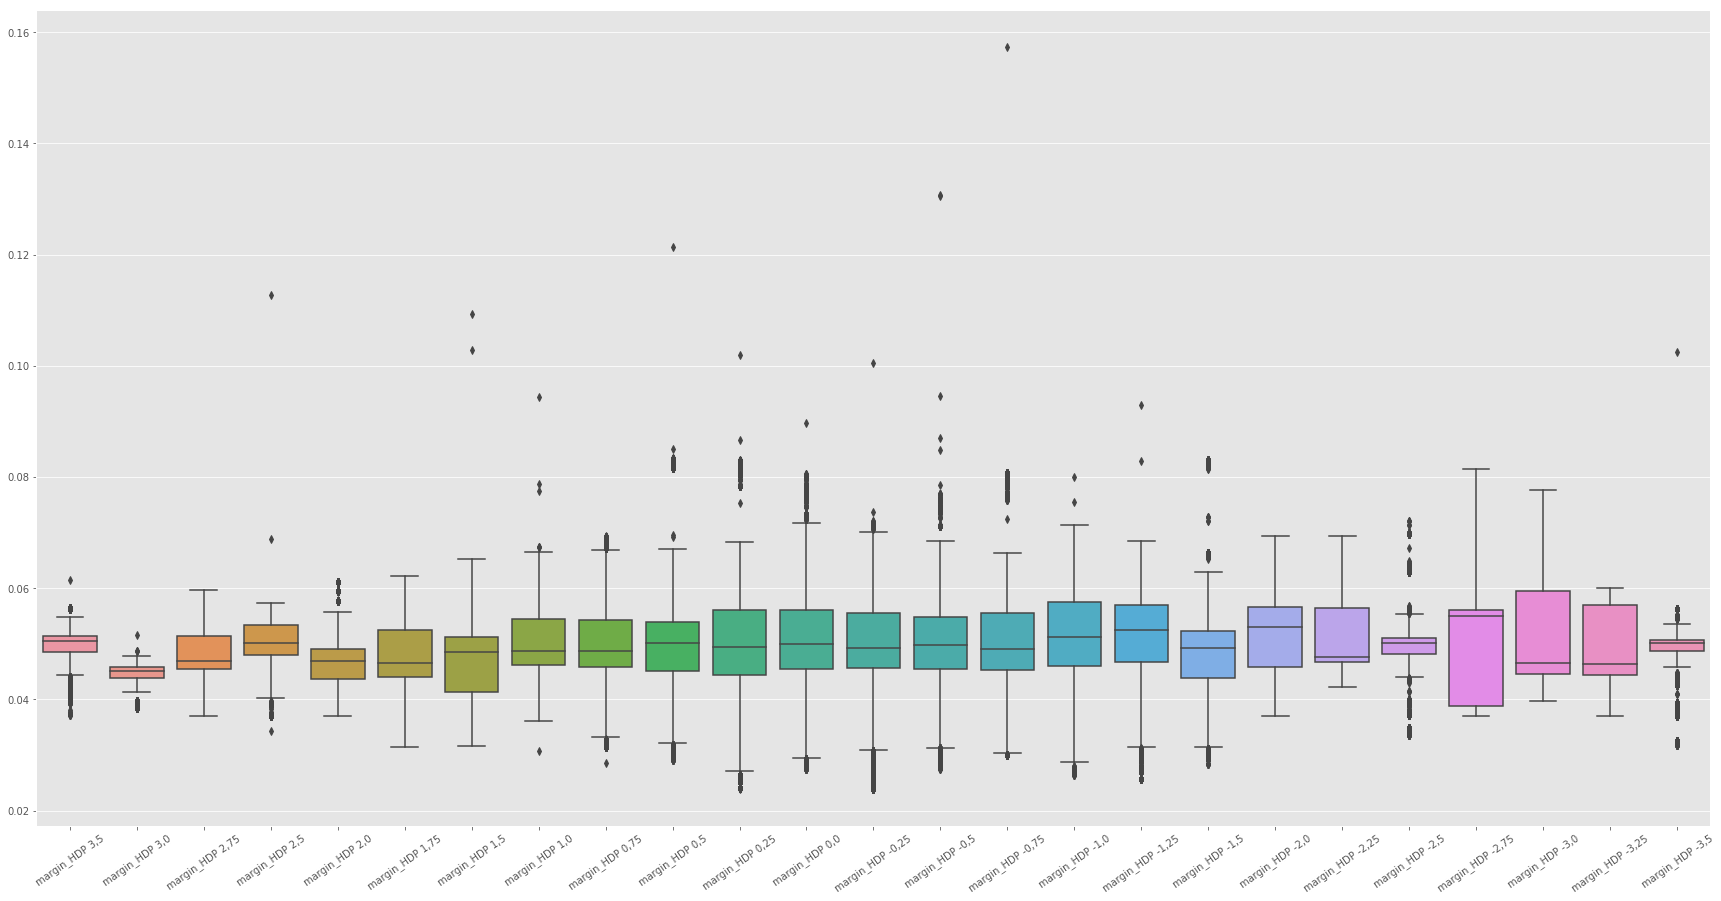

In [439]:
plt.figure(figsize=(30, 15))
sns.boxplot(data=data_hdp.loc[:, not_empty_margin], orient='v')
plt.xticks(rotation=35)

- ### Comparison 0.0, 0.25, 0.5, 0.75 handicaps

In [193]:
# margin for all totals
hdps = list(zip(hdp_columns[::2], hdp_columns[1::2]))

hdps_types = {
    'hdps_0': [],
    'hdps_25': [],
    'hdps_5': [],
    'hdps_75': [],
}

for home, away in hdps:
    hdp_value = home.split(',')[1]
    hdps_types['hdps_' + hdp_value].append((home, away))

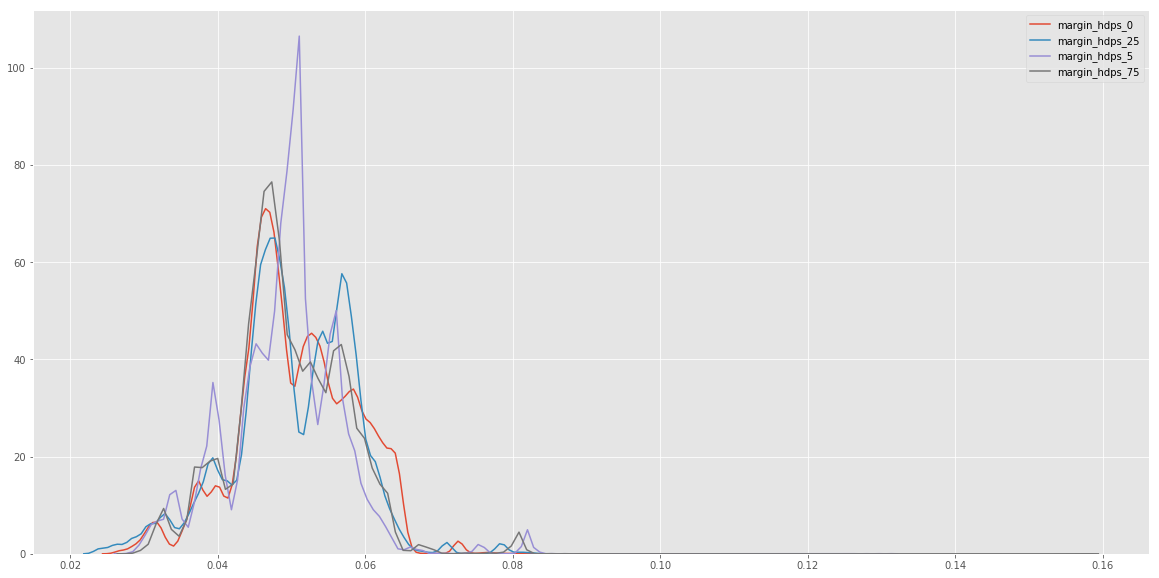

In [195]:
# stack margins
plt.figure(figsize=(20,10))

for k, hdps in hdps_types.items():
    # stack margins of k value
    margins_concat = []
    for home, away in hdps:
        tl_value = float(home.split(' ')[1].replace(',','.'))
        margin_column = 'margin' + home[4:]
        margins_concat.append(
            data_hdp[
                data_hdp[margin_column].notnull()
            ][margin_column].values
        )
        
    margins_all = hstack(margins_concat)
    
    sns.distplot(
        margins_all,
        hist=False, 
        kde_kws={"label": 'margin_' + k},
    )
plt.show()

## Build input parameters

In [245]:
input_params = []

def get_input_totals_params(row):
    for to, tu in totals_types['totals_5']:
        if not np.isnan(row[to]) and not np.isnan(row[tu]):
            tl_value = float('.'.join(to.split('_')[1:]))
            return tl_value, row[to], row[tu]

def get_input_totals_params_fair(row):
    for to, tu in totals_types['totals_5']:
        if not np.isnan(row[to + '_fair']) and not np.isnan(row[tu + '_fair']):
            tl_value = float('.'.join(to.split('_')[1:]))
            return tl_value, row[to + '_fair'], row[tu + '_fair']

In [246]:
input_totals = data_totals.apply(get_input_totals_params, axis=1).tolist()
input_totals_fair = data_totals.apply(get_input_totals_params_fair, axis=1).tolist()

In [247]:
def get_input_hdps_params(row):
    for home, away in hdps_types['hdps_5']:
        if not np.isnan(row[home]) and not np.isnan(row[away]):
            hdp_value = float(home.split(' ')[1].replace(',','.'))
            return hdp_value, row[home], row[away]

def get_input_hdps_params_fair(row):
    for home, away in hdps_types['hdps_5']:
        if not np.isnan(row[home + '_fair']) and not np.isnan(row[away + '_fair']):
            hdp_value = float(home.split(' ')[1].replace(',','.'))
            return hdp_value, row[home + '_fair'], row[away + '_fair']

In [248]:
input_hdps = data_hdp.apply(get_input_hdps_params, axis=1).tolist()
input_hdps_fair = data_hdp.apply(get_input_hdps_params_fair, axis=1).tolist()

## Check odds computing

In [209]:
from odds import compute_odds
import pprint

In [250]:
for tl, hdp, tl_fair, hdp_fair in zip(input_totals[:10], input_hdps[:10],
                                      input_totals_fair[:10], input_hdps_fair[:10]):
    odds, _, _, _ = compute_odds(*tl, *hdp)
    k1, to, tu = tl_fair
    k2, hdp1, hdp2 = hdp_fair
    print(*tl, *hdp)
    print(*tl_fair, *hdp_fair)
    
    print(f'T O {k1}', odds.get(f'T O {k1}'))
    print(f'T U {k1}', odds.get(f'T U {k1}'))
    print(f'HDP1 {k2}', odds.get(f'HDP1 {k2}'))
    print(f'HDP2 {-1*k2}', odds.get(f'HDP2 {-1*k2}'))
    
    print("ERROR TO: ", abs(1/to - 1/odds.get(f'T O {k1}')))
    print("ERROR TU: ", abs(1/tu - 1/odds.get(f'T U {k1}')))
    print("ERROR HDP1: ", abs(1/hdp1 - 1/odds.get(f'HDP1 {k2}')))
    print("ERROR HDP2: ", abs(1/hdp2 - 1/odds.get(f'HDP2 {-1*k2}')))

2.5 1.649 2.22 -0.5 1.813 2.0
2.5 1.7427927927927929 2.3462704669496666 -0.5 1.9064999999999999 2.1031439602868174
T O 2.5 1.7432
T U 2.5 2.34554
HDP1 -0.5 1.90568
HDP2 0.5 2.10415
ERROR TO:  0.00013403631625030776
ERROR TU:  0.0001327332270205095
ERROR HDP1:  0.00022569766533819813
ERROR HDP2:  0.00022733663487778388


./operator_position/skellam.py:59: RuntimeWarning:

invalid value encountered in sqrt

./operator_position/skellam.py:59: RuntimeWarning:

invalid value encountered in power

./operator_position/skellam.py:59: RuntimeWarning:

invalid value encountered in sqrt

./operator_position/skellam.py:59: RuntimeWarning:

invalid value encountered in power

./operator_position/skellam.py:59: RuntimeWarning:

invalid value encountered in sqrt

./operator_position/skellam.py:59: RuntimeWarning:

invalid value encountered in power

./operator_position/skellam.py:59: RuntimeWarning:

invalid value encountered in sqrt

./operator_position/skellam.py:59: RuntimeWarning:

invalid value encountered in power

./operator_position/skellam.py:59: RuntimeWarning:

invalid value encountered in sqrt

./operator_position/skellam.py:59: RuntimeWarning:

invalid value encountered in power

./operator_position/skellam.py:59: RuntimeWarning:

invalid value encountered in sqrt

./operator_position/skellam.py:59: Run

3.5 1.751 2.08 2.5 1.735 2.13
3.5 1.8418269230769229 2.187892632781268 2.5 1.814553990610329 2.2276657060518734
T O 3.5 1.84186
T U 3.5 2.18785
HDP1 2.5 1.81409
HDP2 -2.5 2.22836
ERROR TO:  9.750337976122125e-06
ERROR TU:  8.906357359672601e-06
ERROR HDP1:  0.00014095499411737045
ERROR HDP2:  0.00013986466404364295
2.5 2.2 1.675 -0.5 2.14 1.729
2.5 2.3134328358208953 1.7613636363636362 -0.5 2.23770965876229 1.8079439252336449
T O 2.5 2.31414
T U 2.5 1.76096
HDP1 -0.5 2.23675
HDP2 0.5 1.80857
ERROR TO:  0.00013209115237411417
ERROR TU:  0.00013013429624897377
ERROR HDP1:  0.00019173246269788002
ERROR HDP2:  0.00019147228543781036
2.5 2.24 1.625 -0.5 2.35 1.571
2.5 2.378461538461538 1.7254464285714284 -0.5 2.4958625079567156 1.6685106382978723
T O 2.5 2.3792
T U 2.5 1.72506
HDP1 -0.5 2.4943
HDP2 0.5 1.66921
ERROR TO:  0.00013049708078033406
ERROR TU:  0.00012982655840720891
ERROR HDP1:  0.0002509879628332934
ERROR HDP2:  0.000251108774345532
4.5 1.8 2.01 -3.5 2.19 1.68
4.5 1.895522388059

In [258]:
computed_columns = [x for x in data.columns.tolist() if 'disc' in x or 'computed' in x]
data.loc[:, computed_columns].head(10)

,HOME_computed_,DRAW_computed_,AWAY_computed_,HOME_disc,DRAW_disc,AWAY_disc,HOMEAWAY_computed_,HOMEDRAW_computed_,DRAWAWAY_computed_,HOMEAWAY_disc,HOMEDRAW_disc,DRAWAWAY_disc,TO_0_5_computed_,TU_0_5_computed_,TO_0_5_disc,TU_0_5_disc,TO_0_75_computed_,TU_0_75_computed_,TO_0_75_disc,TU_0_75_disc,TO_1_0_computed_,TU_1_0_computed_,TO_1_0_disc,TU_1_0_disc,TO_1_25_computed_,TU_1_25_computed_,TO_1_25_disc,TU_1_25_disc,TO_1_5_computed_,TU_1_5_computed_,TO_1_5_disc,TU_1_5_disc,TO_1_75_computed_,TU_1_75_computed_,TO_1_75_disc,TU_1_75_disc,TO_2_0_computed_,TU_2_0_computed_,TO_2_0_disc,TU_2_0_disc,TO_2_25_computed_,TU_2_25_computed_,TO_2_25_disc,TU_2_25_disc,TO_2_5_computed_,TU_2_5_computed_,TO_2_5_disc,TU_2_5_disc,TO_2_75_computed_,TU_2_75_computed_,TO_2_75_disc,TU_2_75_disc,TO_3_0_computed_,TU_3_0_computed_,TO_3_0_disc,TU_3_0_disc,TO_3_25_computed_,TU_3_25_computed_,TO_3_25_disc,TU_3_25_disc,TO_3_5_computed_,TU_3_5_computed_,TO_3_5_disc,TU_3_5_disc,TO_3_75_computed_,TU_3_75_computed_,TO_3_75_disc,TU_3_75_disc,TO_4_0_computed_,TU_4_0_computed_,TO_4_0_disc,TU_4_0_disc,TO_4_25_computed_,TU_4_25_computed_,TO_4_25_disc,TU_4_25_disc,TO_4_5_computed_,TU_4_5_computed_,TO_4_5_disc,TU_4_5_disc,TO_4_75_computed_,TU_4_75_computed_,TO_4_75_disc,TU_4_75_disc,TO_5_0_computed_,TU_5_0_computed_,TO_5_0_disc,TU_5_0_disc,TO_5_25_computed_,TU_5_25_computed_,TO_5_25_disc,TU_5_25_disc,TO_5_5_computed_,TU_5_5_computed_,TO_5_5_disc,TU_5_5_disc,TO_5_75_computed_,TU_5_75_computed_,TO_5_75_disc,TU_5_75_disc,...,"HOME_HDP 3,5_computed_","AWAY_HDP -3,5_computed_","HOME_HDP 3,5_disc","AWAY_HDP -3,5_disc","HOME_HDP 3,0_computed_","AWAY_HDP -3,0_computed_","HOME_HDP 3,0_disc","AWAY_HDP -3,0_disc","HOME_HDP 2,75_computed_","AWAY_HDP -2,75_computed_","HOME_HDP 2,75_disc","AWAY_HDP -2,75_disc","HOME_HDP 2,5_computed_","AWAY_HDP -2,5_computed_","HOME_HDP 2,5_disc","AWAY_HDP -2,5_disc","HOME_HDP 2,0_computed_","AWAY_HDP -2,0_computed_","HOME_HDP 2,0_disc","AWAY_HDP -2,0_disc","HOME_HDP 1,75_computed_","AWAY_HDP -1,75_computed_","HOME_HDP 1,75_disc","AWAY_HDP -1,75_disc","HOME_HDP 1,5_computed_","AWAY_HDP -1,5_computed_","HOME_HDP 1,5_disc","AWAY_HDP -1,5_disc","HOME_HDP 1,0_computed_","AWAY_HDP -1,0_computed_","HOME_HDP 1,0_disc","AWAY_HDP -1,0_disc","HOME_HDP 0,75_computed_","AWAY_HDP -0,75_computed_","HOME_HDP 0,75_disc","AWAY_HDP -0,75_disc","HOME_HDP 0,5_computed_","AWAY_HDP -0,5_computed_","HOME_HDP 0,5_disc","AWAY_HDP -0,5_disc","HOME_HDP 0,25_computed_","AWAY_HDP-0,25_computed_","HOME_HDP 0,25_disc","AWAY_HDP -0,25_disc","HOME_HDP 0,0_computed_","AWAY_HDP 0,0_computed_","HOME_HDP 0,0_disc","AWAY_HDP 0,0_disc","HOME_HDP -0,25_computed_","AWAY_HDP 0,25_computed_","HOME_HDP -0,25_disc","AWAY_HDP 0,25_disc","HOME_HDP -0,5_computed_","AWAY_HDP 0,5_computed_","HOME_HDP -0,5_disc","AWAY_HDP 0,5_disc","HOME_HDP -0,75_computed_","AWAY_HDP 0,75_computed_","HOME_HDP -0,75_disc","AWAY_HDP 0,75_disc","HOME_HDP -1,0_computed_","AWAY_HDP 1,0_computed_","HOME_HDP -1,0_disc","AWAY_HDP 1,0_disc","HOME_HDP -1,25_computed_","AWAY_HDP 1,25_computed_","HOME_HDP -1,25_disc","AWAY_HDP 1,25_disc","HOME_HDP -1,5_computed_","AWAY_HDP 1,5_computed_","HOME_HDP -1,5_disc","AWAY_HDP 1,5_disc","HOME_HDP -2,0_computed_","AWAY_HDP 2,0_computed_","HOME_HDP -2,0_disc","AWAY_HDP 2,0_disc","HOME_HDP -2,25_computed_","AWAY_HDP 2,25_computed_","HOME_HDP -2,25_disc","AWAY_HDP 2,25_disc","HOME_HDP -2,5_computed_","AWAY_HDP 2,5_computed_","HOME_HDP -2,5_disc","AWAY_HDP 2,5_disc","HOME_HDP -2,75_computed_","AWAY_HDP 2,75_computed_","HOME_HDP -2,75_disc","AWAY_HDP 2,75_disc","HOME_HDP -3,0_computed_","AWAY_HDP 3,0_computed_","HOME_HDP -3,0_disc","AWAY_HDP 3,0_disc","HOME_HDP -3,25_computed_","AWAY_HDP 3,25_computed_","HOME_HDP -3,25_disc","AWAY_HDP 3,25_disc","HOME_HDP -3,5_computed_","AWAY_HDP 3,5_computed_","HOME_HDP -3,5_disc","AWAY_HDP 3,5_disc"
0,1.90568,4.34421,4.08061,0.006377,0.021094,0.014717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [276]:
# build mapping columns
col_map = {
    'HOME': 'ML 1',
    'DRAW': 'ML X',
    'AWAY': 'ML 2',
    'HOMEAWAY': 'DC 12',
    'HOMEDRAW': 'DC 1X',
    'DRAWAWAY': 'DC X2'
}

for col in input_cols[13:]:
    if 'TO' in col or 'TU' in col:
        odds_col = col.split('_')
        odds_col = ' '.join(odds_col[0]) + ' ' + '.'.join(odds_col[1:])
        col_map[col] = odds_col
    if 'T1O' in col or 'T1U' in col or 'T2O' in col or 'T2U' in col:
        odds_col = col.split('_')
        odds_col = ' '.join([odds_col[0][:2], odds_col[0][2]]) + ' ' + '.'.join(odds_col[1:])
        col_map[col] = odds_col
    if 'HDP' in col:
        odds_col = col.replace('HOME_HDP', 'HDP1').replace('AWAY_HDP', 'HDP2').replace(',', '.')
        col_map[col] = odds_col

In [448]:
# errors dataframe
import warnings
from tqdm import tqdm_notebook

model_errors = pd.DataFrame()

for i, (tl, hdp, tl_fair, hdp_fair) in tqdm_notebook(enumerate(list(zip(input_totals, input_hdps,
                                                          input_totals_fair, input_hdps_fair)))):
    with warnings.catch_warnings(record=True) as w:
        odds, _, _, _ = compute_odds(*tl, *hdp)
        model_errors.loc[i, 'warning'] = 0
        print(w)
        if len(w) > 0:
            model_errors.loc[i, 'warning'] = 1

    k1, to, tu = tl
    k2, hdp1, hdp2 = hdp
    
    model_errors.loc[i, 'k1'] = k1
    model_errors.loc[i, 'to'] = to
    model_errors.loc[i, 'tu'] = tu
    model_errors.loc[i, 'margin_TL'] = margin_2(to, tu)
    
    model_errors.loc[i, 'k2'] = k2
    model_errors.loc[i, 'hdp1'] = hdp1
    model_errors.loc[i, 'hdp2'] = hdp2
    model_errors.loc[i, 'margin_HDP'] = margin_2(hdp1, hdp2)

    try:
        not_null_columns = (
            data_ml
            .loc[i, ml_columns]
            .T[
                data_ml
                .loc[i, ml_columns]
                .notnull()
            ]
            .index.tolist()
        )
        for not_null_col in not_null_columns:
            model_errors.loc[i, not_null_col] = data_ml.loc[i, not_null_col]
            model_errors.loc[i, not_null_col + '_fair'] = data_ml.loc[i, not_null_col + '_fair']
            model_errors.loc[i, not_null_col + '_predicted'] = odds.get(col_map.get(not_null_col))
            model_errors.loc[i, not_null_col + '_error'] = abs(1 / model_errors.loc[i, not_null_col + '_fair'] - 1 / model_errors.loc[i, not_null_col + '_predicted'])
    
    except KeyError:
        print('No ML bets')
    
    not_null_columns = (
        data_totals
        .loc[i, total_columns]
        .T[
            data_totals
            .loc[i, total_columns]
            .notnull()
        ]
        .index.tolist()
    )
    for not_null_col in not_null_columns:
        model_errors.loc[i, not_null_col] = data_totals.loc[i, not_null_col]
        model_errors.loc[i, not_null_col + '_fair'] = data_totals.loc[i, not_null_col + '_fair']
        model_errors.loc[i, not_null_col + '_predicted'] = odds.get(col_map.get(not_null_col))
        model_errors.loc[i, not_null_col + '_error'] = abs(1 / model_errors.loc[i, not_null_col + '_fair'] - 1 / model_errors.loc[i, not_null_col + '_predicted'])
    
    not_null_columns = (
        data_hdp
        .loc[i, hdp_columns]
        .T[
            data_hdp
            .loc[i, hdp_columns]
            .notnull()
        ]
        .index.tolist()
    )
    for not_null_col in not_null_columns:
        model_errors.loc[i, not_null_col] = data_hdp.loc[i, not_null_col]
        model_errors.loc[i, not_null_col + '_fair'] = data_hdp.loc[i, not_null_col + '_fair']
        model_errors.loc[i, not_null_col + '_predicted'] = odds.get(col_map.get(not_null_col))
        model_errors.loc[i, not_null_col + '_error'] = abs(1 / model_errors.loc[i, not_null_col + '_fair'] - 1 / model_errors.loc[i, not_null_col + '_predicted'])


[]
[<warnings.WarningMessage object at 0x1af48d4f98>, <warnings.WarningMessage object at 0x1af48cd4e0>, <warnings.WarningMessage object at 0x1af48cd4a8>, <warnings.WarningMessage object at 0x1af48a66d8>, <warnings.WarningMessage object at 0x1af48d27f0>, <warnings.WarningMessage object at 0x1af48d2f28>, <warnings.WarningMessage object at 0x1af48d2a90>, <warnings.WarningMessage object at 0x1af48bc1d0>, <warnings.WarningMessage object at 0x1af48bca58>, <warnings.WarningMessage object at 0x1af48bcf28>, <warnings.WarningMessage object at 0x1af48b5668>, <warnings.WarningMessage object at 0x1af48b5048>, <warnings.WarningMessage object at 0x1af48bce10>, <warnings.WarningMessage object at 0x1af48bb160>, <warnings.WarningMessage object at 0x1af48a1d30>, <warnings.WarningMessage object at 0x1af48bb7f0>, <warnings.WarningMessage object at 0x1af48bb908>, <warnings.WarningMessage object at 0x1af48bb2b0>, <warnings.WarningMessage object at 0x1af48bba20>, <warnings.WarningMessage object at 0x1af48bb20

[]
[]
[]
[]
No ML bets
[]
[<warnings.WarningMessage object at 0x1af6defbe0>, <warnings.WarningMessage object at 0x1af6def5c0>, <warnings.WarningMessage object at 0x1af6defc18>, <warnings.WarningMessage object at 0x1af6def278>, <warnings.WarningMessage object at 0x1af6deff60>, <warnings.WarningMessage object at 0x1af6def198>, <warnings.WarningMessage object at 0x1af6def208>]
[]
[]
[<warnings.WarningMessage object at 0x1af48bc198>, <warnings.WarningMessage object at 0x1af48d7b00>]
[]
[]
[<warnings.WarningMessage object at 0x1af48d1dd8>, <warnings.WarningMessage object at 0x1af48d1358>]
[]
[]
[]
[]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af6defe80>, <warnings.WarningMessage object at 0x1af6def550>, <warnings.WarningMessage object at 0x1af6deff60>, <warnings.WarningMessage object at 0x1af6def198>, <warnings.WarningMessage object at 0x1af48d1358>, <warnings.WarningMessage object at 0x1af6def358>, <warnings.WarningMessage object at 0x1af6defe48>, <warnings.WarningMessage object at 0x

[]
No ML bets
[<warnings.WarningMessage object at 0x1af6df0588>, <warnings.WarningMessage object at 0x1af6df0b70>, <warnings.WarningMessage object at 0x1af6df02e8>, <warnings.WarningMessage object at 0x1af6df03c8>, <warnings.WarningMessage object at 0x1af48bb7f0>, <warnings.WarningMessage object at 0x1af6df0a20>, <warnings.WarningMessage object at 0x1af6df0160>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af48d7cc0>, <warnings.WarningMessage object at 0x1af48d7e10>, <warnings.WarningMessage object at 0x1af48d2a90>, <warnings.WarningMessage object at 0x1af48d26a0>, <warnings.WarningMessage object at 0x1af48cd4e0>, <warnings.WarningMessage object at 0x1af48d6cf8>, <warnings.WarningMessage object at 0x1af48cd4a8>, <warnings.WarningMessage object at 0x1af48d25f8>, <warnings.WarningMessage object at 0x1af48d7d30>, <warnings.WarningMessage object at 0x1af489fda0>, <warnings.WarningMessage object at 0x1af489f5c0>, <warnings.Warni

[]
[]
[]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af6df0080>, <warnings.WarningMessage object at 0x1af6df09e8>, <warnings.WarningMessage object at 0x1af48bcf28>, <warnings.WarningMessage object at 0x1af6df04a8>, <warnings.WarningMessage object at 0x1af6df0a90>, <warnings.WarningMessage object at 0x1af6df0550>, <warnings.WarningMessage object at 0x1af6df0e10>, <warnings.WarningMessage object at 0x1af6df00f0>, <warnings.WarningMessage object at 0x1af6df0a58>, <warnings.WarningMessage object at 0x1af6df0240>, <warnings.WarningMessage object at 0x1af6df0e80>]
[]
[]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af48a3828>, <warnings.WarningMessage object at 0x1af489fda0>, <warnings.WarningMessage object at 0x1af48d75c0>, <warnings.WarningMessage object at 0x1af48d8a58>, <warnings.WarningMessage object at 0x1af48d16a0>, <warnings.WarningMessage object at 0x1af48d8278>, <warnings.WarningMessage object at 0x1af48bca58>]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af48bb9e8>, <warn

[<warnings.WarningMessage object at 0x1af48e5518>, <warnings.WarningMessage object at 0x1af48d7b00>]
[]
[<warnings.WarningMessage object at 0x1af3c20b00>, <warnings.WarningMessage object at 0x1af3c20f60>, <warnings.WarningMessage object at 0x1af3c20358>, <warnings.WarningMessage object at 0x1af3c20e48>, <warnings.WarningMessage object at 0x1af48d4f98>, <warnings.WarningMessage object at 0x1af3c206d8>, <warnings.WarningMessage object at 0x1af3c206a0>]
[]
No ML bets
[]
[]
[]
No ML bets
[]
[<warnings.WarningMessage object at 0x1af3c20518>, <warnings.WarningMessage object at 0x1af3c20ba8>, <warnings.WarningMessage object at 0x1af3c202b0>, <warnings.WarningMessage object at 0x1af3c20eb8>, <warnings.WarningMessage object at 0x1af3c20a20>, <warnings.WarningMessage object at 0x1af3c20160>, <warnings.WarningMessage object at 0x1af3c20198>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af48e4f98>, <warnings.WarningMessage object at 0x1af48e4ac8>, <warnings.WarningMessage obje

[]
[]
[<warnings.WarningMessage object at 0x1af48e4828>, <warnings.WarningMessage object at 0x1af48e5320>, <warnings.WarningMessage object at 0x1af3c15f60>, <warnings.WarningMessage object at 0x1af3c158d0>, <warnings.WarningMessage object at 0x1af3c15d30>, <warnings.WarningMessage object at 0x1af3c15e10>, <warnings.WarningMessage object at 0x1af48e4780>, <warnings.WarningMessage object at 0x1af3c15ef0>, <warnings.WarningMessage object at 0x1af3c15588>, <warnings.WarningMessage object at 0x1af3c15da0>, <warnings.WarningMessage object at 0x1af3c15fd0>, <warnings.WarningMessage object at 0x1af3c15898>, <warnings.WarningMessage object at 0x1af3c15dd8>, <warnings.WarningMessage object at 0x1af3c15f98>, <warnings.WarningMessage object at 0x1af3c15eb8>, <warnings.WarningMessage object at 0x1af48d75c0>, <warnings.WarningMessage object at 0x1af3c15940>, <warnings.WarningMessage object at 0x1af48d7860>, <warnings.WarningMessage object at 0x1af3c15e48>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

[]
[]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af48d1898>, <warnings.WarningMessage object at 0x1af48f3048>]
[]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af3c20fd0>, <warnings.WarningMessage object at 0x1af3c204a8>, <warnings.WarningMessage object at 0x1af3c20208>, <warnings.WarningMessage object at 0x1af3c206a0>, <warnings.WarningMessage object at 0x1af48cd4a8>, <warnings.WarningMessage object at 0x1af3c20f60>, <warnings.WarningMessage object at 0x1af48d8a58>, <warnings.WarningMessage object at 0x1af3c202e8>, <warnings.WarningMessage object at 0x1af3c20b00>, <warnings.WarningMessage object at 0x1af3c20b70>, <warnings.WarningMessage object at 0x1af3c20a20>, <warnings.WarningMessage object at 0x1af3c20ac8>, <warnings.WarningMessage object at 0x1af3c20198>, <warnings.WarningMessage object at 0x1af3c20278>]
[]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af3c15da0>, <warnings.WarningMessage object at 0x1af3c15c50>, <warnings.WarningMessage object at 0x1af3c15cc0>, <warning

[]
[]
[]
[]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af6defc50>, <warnings.WarningMessage object at 0x1af6def160>, <warnings.WarningMessage object at 0x1af6def940>, <warnings.WarningMessage object at 0x1af6def6a0>, <warnings.WarningMessage object at 0x1af6def710>, <warnings.WarningMessage object at 0x1af6defa58>, <warnings.WarningMessage object at 0x1af6defda0>]
[]
No ML bets
[]
[]
[<warnings.WarningMessage object at 0x1af6df0908>, <warnings.WarningMessage object at 0x1af6df0be0>, <warnings.WarningMessage object at 0x1af6df0358>, <warnings.WarningMessage object at 0x1af6df0668>, <warnings.WarningMessage object at 0x1af3c15e48>, <warnings.WarningMessage object at 0x1af3c15940>, <warnings.WarningMessage object at 0x1af3c15c50>]
[]
[<warnings.WarningMessage object at 0x1af48d7eb8>, <warnings.WarningMessage object at 0x1af48d8d30>, <warnings.WarningMessage object at 0x1af48d86d8>, <warnings.WarningMessage object at 0x1af48d8208>, <warnings.WarningMessage object at 0x1af48d8a58>, <wa

[]
[]
[]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af48e4cc0>, <warnings.WarningMessage object at 0x1af48e4e10>]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af6dfbbe0>, <warnings.WarningMessage object at 0x1af6dfbf60>]
[]
[<warnings.WarningMessage object at 0x1af48e4f98>, <warnings.WarningMessage object at 0x1af48e4fd0>, <warnings.WarningMessage object at 0x1af48e4588>, <warnings.WarningMessage object at 0x1af48e4780>, <warnings.WarningMessage object at 0x1af48e4438>, <warnings.WarningMessage object at 0x1af48e4828>, <warnings.WarningMessage object at 0x1af48e4630>]
[]
[<warnings.WarningMessage object at 0x1af3c20fd0>, <warnings.WarningMessage object at 0x1af48e4438>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
No ML bets
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[<warnings.WarningMessage object at 0x1af6df0048>, <warnings.WarningMessage object at 0x1af6df0cc0>]
[<warnings.WarningMessage object at 0x1af6df0be0>, <warnings.WarningMessage object at 0x1af6df0eb8>, <warnings.WarningMessage obj

KeyboardInterrupt: 

In [480]:
model_errors.drop_duplicates(inplace=True)
model_errors.shape

(100, 349)

In [311]:
model_errors[model_errors['warning'] == 1]

,warning,k1,to,tu,k2,hdp1,hdp2,HOME,HOME_fair,HOME_predicted,HOME_error,DRAW,DRAW_fair,DRAW_predicted,DRAW_error,AWAY,AWAY_fair,AWAY_predicted,AWAY_error,TO_2_25,TO_2_25_fair,TO_2_25_predicted,TO_2_25_error,TU_2_25,TU_2_25_fair,TU_2_25_predicted,TU_2_25_error,TO_2_5,TO_2_5_fair,TO_2_5_predicted,TO_2_5_error,TU_2_5,TU_2_5_fair,TU_2_5_predicted,TU_2_5_error,TO_2_75,TO_2_75_fair,TO_2_75_predicted,TO_2_75_error,TU_2_75,TU_2_75_fair,TU_2_75_predicted,TU_2_75_error,TO_3_0,TO_3_0_fair,TO_3_0_predicted,TO_3_0_error,TU_3_0,TU_3_0_fair,TU_3_0_predicted,TU_3_0_error,TO_3_25,TO_3_25_fair,TO_3_25_predicted,TO_3_25_error,TU_3_25,TU_3_25_fair,TU_3_25_predicted,TU_3_25_error,"HOME_HDP 0,0","HOME_HDP 0,0_fair","HOME_HDP 0,0_predicted","HOME_HDP 0,0_error","AWAY_HDP 0,0","AWAY_HDP 0,0_fair","AWAY_HDP 0,0_predicted","AWAY_HDP 0,0_error","HOME_HDP -0,25","HOME_HDP -0,25_fair","HOME_HDP -0,25_predicted","HOME_HDP -0,25_error","AWAY_HDP 0,25","AWAY_HDP 0,25_fair","AWAY_HDP 0,25_predicted","AWAY_HDP 0,25_error","HOME_HDP -0,5","HOME_HDP -0,5_fair","HOME_HDP -0,5_predicted","HOME_HDP -0,5_error","AWAY_HDP 0,5","AWAY_HDP 0,5_fair","AWAY_HDP 0,5_predicted","AWAY_HDP 0,5_error","HOME_HDP -0,75","HOME_HDP -0,75_fair","HOME_HDP -0,75_predicted","HOME_HDP -0,75_error","AWAY_HDP 0,75","AWAY_HDP 0,75_fair","AWAY_HDP 0,75_predicted","AWAY_HDP 0,75_error","HOME_HDP -1,0","HOME_HDP -1,0_fair","HOME_HDP -1,0_predicted","HOME_HDP -1,0_error","AWAY_HDP 1,0","AWAY_HDP 1,0_fair","AWAY_HDP 1,0_predicted","AWAY_HDP 1,0_error",TO_3_5,...,"AWAY_HDP 3,25","AWAY_HDP 3,25_fair","AWAY_HDP 3,25_predicted","AWAY_HDP 3,25_error","HOME_HDP -3,5","HOME_HDP -3,5_fair","HOME_HDP -3,5_predicted","HOME_HDP -3,5_error","AWAY_HDP 3,5","AWAY_HDP 3,5_fair","AWAY_HDP 3,5_predicted","AWAY_HDP 3,5_error","HOME_HDP -1,25","HOME_HDP -1,25_fair","HOME_HDP -1,25_predicted","HOME_HDP -1,25_error","AWAY_HDP 1,25","AWAY_HDP 1,25_fair","AWAY_HDP 1,25_predicted","AWAY_HDP 1,25_error","HOME_HDP -1,5","HOME_HDP -1,5_fair","HOME_HDP -1,5_predicted","HOME_HDP -1,5_error","AWAY_HDP 1,5","AWAY_HDP 1,5_fair","AWAY_HDP 1,5_predicted","AWAY_HDP 1,5_error",TO_1_5,TO_1_5_fair,TO_1_5_predicted,TO_1_5_error,TU_1_5,TU_1_5_fair,TU_1_5_predicted,TU_1_5_error,"HOME_HDP 0,5","HOME_HDP 0,5_fair","HOME_HDP 0,5_predicted","HOME_HDP 0,5_error","AWAY_HDP -0,5","AWAY_HDP -0,5_fair","AWAY_HDP -0,5_predicted","AWAY_HDP -0,5_error","HOME_HDP 1,5","HOME_HDP 1,5_fair","HOME_HDP 1,5_predicted","HOME_HDP 1,5_error","AWAY_HDP -1,5","AWAY_HDP -1,5_fair","AWAY_HDP -1,5_predicted","AWAY_HDP -1,5_error","HOME_HDP 1,0","HOME_HDP 1,0_fair","HOME_HDP 1,0_predicted","HOME_HDP 1,0_error","AWAY_HDP -1,0","AWAY_HDP -1,0_fair","AWAY_HDP -1,0_predicted","AWAY_HDP -1,0_error","HOME_HDP -2,0","HOME_HDP -2,0_fair","HOME_HDP -2,0_predicted","HOME_HDP -2,0_error","AWAY_HDP 2,0","AWAY_HDP 2,0_fair","AWAY_HDP 2,0_predicted","AWAY_HDP 2,0_error","HOME_HDP -2,25","HOME_HDP -2,25_fair","HOME_HDP -2,25_predicted","HOME_HDP -2,25_error","AWAY_HDP 2,25","AWAY_HDP 2,25_fair","AWAY_HDP 2,25_predicted","AWAY_HDP 2,25_error","HOME_HDP -2,5","HOME_HDP -2,5_fair","HOME_HDP -2,5_predicted","HOME_HDP -2,5_error","AWAY_HDP 2,5","AWAY_HDP 2,5_fair","AWAY_HDP 2,5_predicted","AWAY_HDP 2,5_error","HOME_HDP 0,75","HOME_HDP 0,75_fair","HOME_HDP 0,75_predicted","HOME_HDP 0,75_error","AWAY_HDP -0,75","AWAY_HDP -0,75_fair","AWAY_HDP -0,75_predicted","AWAY_HDP -0,75_error",TO_1_25,TO_1_25_fair,TO_1_25_predicted,TO_1_25_error,TU_1_25,TU_1_25_fair,TU_1_25_predicted,TU_1_25_error
1,1.0,3.5,1.751,2.080,2.5,1.735,2.130,17.470,18.567775,17.05017,0.004794,8.87,9.427370,9.31179,0.001317,1.120,1.190378,1.19910,0.006110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.581,1.664286,1.65675,0.002733,2.380,2.505376,2.52264,0.002732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.751,...,NaN,NaN,

In [315]:
plt.figure(figsize=(20,10))
error_columns = [x for x in model_errors.columns.tolist() if 'error' in x]

not_empty_errors = (model_errors.loc[:, error_columns].count() != 0).reset_index()
not_empty_errors = not_empty_errors.loc[not_empty_errors[0], 'index'].tolist()

model_errors.loc[:, not_empty_errors].describe(percentiles=[.25, .5, .75, .95, .99])

,HOME_error,DRAW_error,AWAY_error,TO_2_25_error,TU_2_25_error,TO_2_5_error,TU_2_5_error,TO_2_75_error,TU_2_75_error,TO_3_0_error,TU_3_0_error,TO_3_25_error,TU_3_25_error,"HOME_HDP 0,0_error","AWAY_HDP 0,0_error","HOME_HDP -0,25_error","AWAY_HDP 0,25_error","HOME_HDP -0,5_error","AWAY_HDP 0,5_error","HOME_HDP -0,75_error","AWAY_HDP 0,75_error","HOME_HDP -1,0_error","AWAY_HDP 1,0_error",TO_3_5_error,TU_3_5_error,TO_3_75_error,TU_3_75_error,TO_4_0_error,TU_4_0_error,TO_4_25_error,TU_4_25_error,"HOME_HDP 2,75_error","AWAY_HDP -2,75_error","HOME_HDP 2,5_error","AWAY_HDP -2,5_error","HOME_HDP 2,0_error","AWAY_HDP -2,0_error","HOME_HDP 1,75_error","AWAY_HDP -1,75_error",TO_1_75_error,TU_1_75_error,TO_2_0_error,TU_2_0_error,"HOME_HDP 0,25_error","AWAY_HDP -0,25_error",TO_4_5_error,TU_4_5_error,TO_4_75_error,TU_4_75_error,TO_5_0_error,TU_5_0_error,TO_5_25_error,TU_5_25_error,"HOME_HDP -2,75_error","AWAY_HDP 2,75_error","HOME_HDP -3,0_error","AWAY_HDP 3,0_error","HOME_HDP -3,25_error","AWAY_HDP 3,25_error","HOME_HDP -3,5_error","AWAY_HDP 3,5_error","HOME_HDP -1,25_error","AWAY_HDP 1,25_error","HOME_HDP -1,5_error","AWAY_HDP 1,5_error",TO_1_5_error,TU_1_5_error,"HOME_HDP 0,5_error","AWAY_HDP -0,5_error","HOME_HDP 1,5_error","AWAY_HDP -1,5_error","HOME_HDP 1,0_error","AWAY_HDP -1,0_error","HOME_HDP -2,0_error","AWAY_HDP 2,0_error","HOME_HDP -2,25_error","AWAY_HDP 2,25_error","HOME_HDP -2,5_error","AWAY_HDP 2,5_error","HOME_HDP 0,75_error","AWAY_HDP -0,75_error",TO_1_25_error,TU_1_25_error
count,74.000000,74.000000,74.000000,63.000000,63.000000,66.000000,66.000000,58.000000,58.000000,38.000000,38.000000,26.000000,26.000000,48.000000,48.000000,50.000000,50.000000,56.000000,56.000000,40.000000,40.000000,28.000000,28.000000,32.000000,32.000000,7.000000,7.000000,3.000000,3.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.00000,3.000000,3.000000,4.000000,4.000000,34.000000,34.000000,4.800000e+01,4.800000e+01,37.000000,37.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19.000000,19.000000,32.000000,32.000000,26.000000,26.000000,3.300000e+01,33.000000,12.000000,12.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,10.000000,10.000000,1.000000,1.00000
mean,0.011068,0.016460,0.007941,0.003471,0.003471,0.002758,0.002758,0.003693,0.003693,0.005390,0.005390,0.005893,0.005893,0.014444,0.014444,0.012343,0.012343,0.008890,0.008890,0.008623,0.008623,0.015819,0.015819,0.008325,0.008325,0.001833,0.001833,0.006900,0.006900,0.005682,0.005683,0.004475,0.004475,0.000141,0.00014,0.010484,0.010484,0.007553,0.007553,0.002811,0.002811,4.042203e-03,4.041909e-03,0.010557,0.010557,0.007044,0.007044,0.004098,0.004099,0.009821,0.009820,0.013374,0.013374,0.011639,0.011641,0.007560,0.007560,0.003004,0.003004,0.000179,0.000180,0.014423,0.014422,0.011635,0.011635,0.000100,0.000100,3.312244e-03,0.003312,0.000132,0.000132,0.004290,0.004289,0.002872,0.002871,0.004364,0.004364,0.004918,0.004920,0.002236,0.002237,0.001838,0.00184
std,0.009745,0.009148,0.007675,0.003976,0.003976,0.004867,0.004867,0.004750,0.004750,0.004977,0.004978,0.007059,0.007059,0.008471,0.008471,0.009896,0.009896,0.012033,0.012032,0.008341,0.008340,0.009327,0.009327,0.008368,0.008367,0.001804,0.001804,0.006052,0.006051,0.006311,0.006311,NaN,NaN,NaN,NaN,0.007987,0.007987,0.010764,0.010763,0.002590,0.002590,3.291192e-03,3.291003e-03,0.007743,0.007743,0.008908,0.008908,0.001166,0.001166,0.001249,0.001248,NaN,NaN,NaN,NaN,0.002505,0.002505,0.001120,0.001119,0.000011,0.000012,0.011036,0.011037,0.011482,0.011482,0.000041,0.000041,6.160261e-03,0.006160,0.000056,0.000055,0.003719,0.003719,0.002356,0.002356,0.002780,0.002780,0.004233,0.004234,0.001846,0.001845,NaN,NaN
min,0.000079,0.000281,0.000057,0.000014,0.000014,0.000003,0.000003,0.000028,0.000026,0.000152,0.000150,0.000096,0.000097,0.000504,0.000503,0.001913,0.001911,0.000002,0.000001,0.000335,0.000335,0.001576,0.001574,0.000010,

<Figure size 1440x720 with 0 Axes>

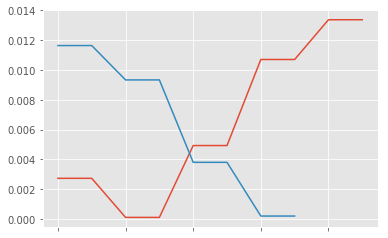

In [350]:
total_error_columns = [x for x in model_errors.columns.tolist() if 'error' in x and ('TO' in x or 'TU' in x)]
hdp_error_columns = [x for x in model_errors.columns.tolist() if 'error' in x and ('HDP' in x or 'HDP' in x)]

model_errors.loc[4, total_error_columns].dropna().plot()
model_errors.loc[4, hdp_error_columns].dropna().plot()

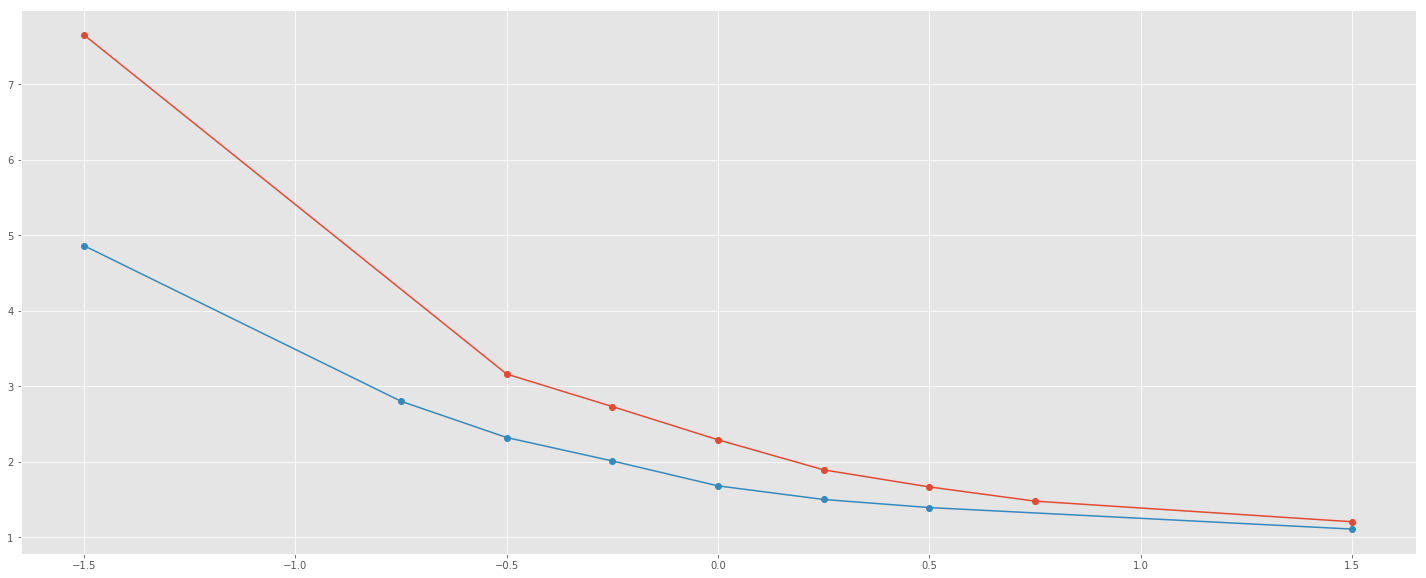

In [394]:
# odds dynamic
plt.figure(figsize=(25,10))

to_cols = [x for x in data_hdp.columns.tolist() if 'HOME_HDP' in x and 'fair' not in x]
tu_cols = [x for x in data_hdp.columns.tolist() if 'AWAY_HDP' in x and 'fair' not in x]

df_odds_1 = data_hdp.loc[32, to_cols].dropna().T.reset_index()
df_odds_1['index'] = df_odds_1['index'].apply(lambda x: float(x[8:].replace(',', '.')))
df_odds_1.sort_values('index', inplace=True)
plt.plot(df_odds_1['index'], df_odds_1[32], '-o')

df_odds_2 = data_hdp.loc[32, tu_cols].dropna().T.reset_index()
df_odds_2['index'] = df_odds_2['index'].apply(lambda x: float(x[8:].replace(',', '.')))
df_odds_2.sort_values('index', inplace=True)
plt.plot(df_odds_2['index'], df_odds_2[32], '-o')

plt.show()

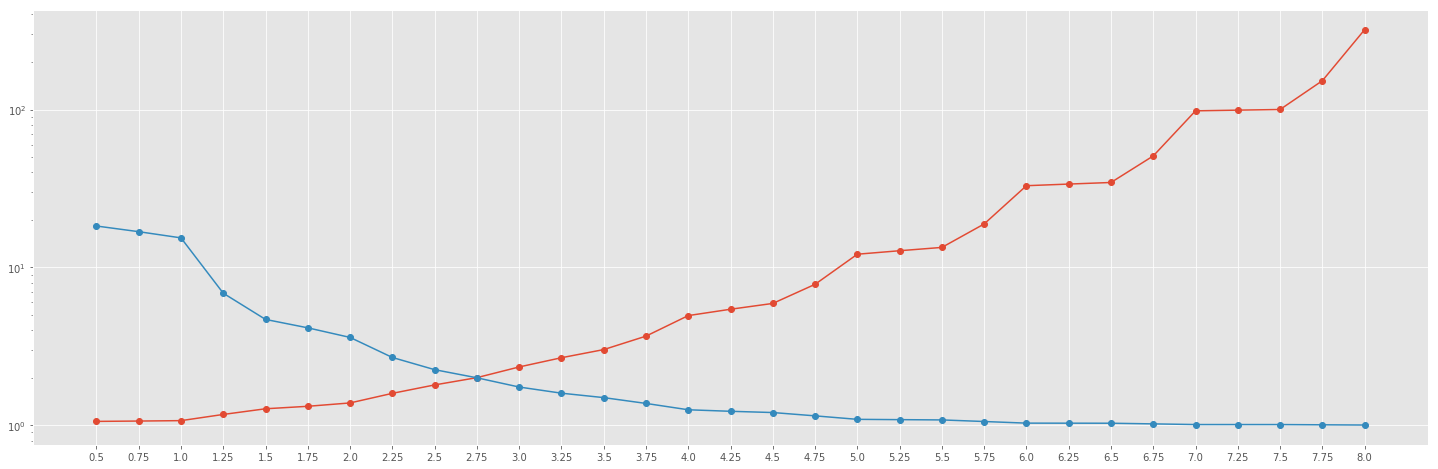

In [395]:
# odds dynamic
plt.figure(figsize=(25,8))

df_odds = pd.DataFrame.from_dict([odds])

to_cols = [x for x in df_odds.columns.tolist() if 'T O' in x]
tu_cols = [x for x in df_odds.columns.tolist() if 'T U' in x]

df_odds_1 = df_odds.loc[0, to_cols].T.reset_index()
df_odds_1['index'] = df_odds_1['index'].apply(lambda x: x.split(' ')[2])
plt.plot(df_odds_1['index'], df_odds_1[0], '-o')

df_odds_2 = df_odds.loc[0, tu_cols].T.reset_index()
df_odds_2['index'] = df_odds_2['index'].apply(lambda x: x.split(' ')[2])
plt.plot(df_odds_2['index'], df_odds_2[0], '-o')

plt.yscale('log')
plt.show()

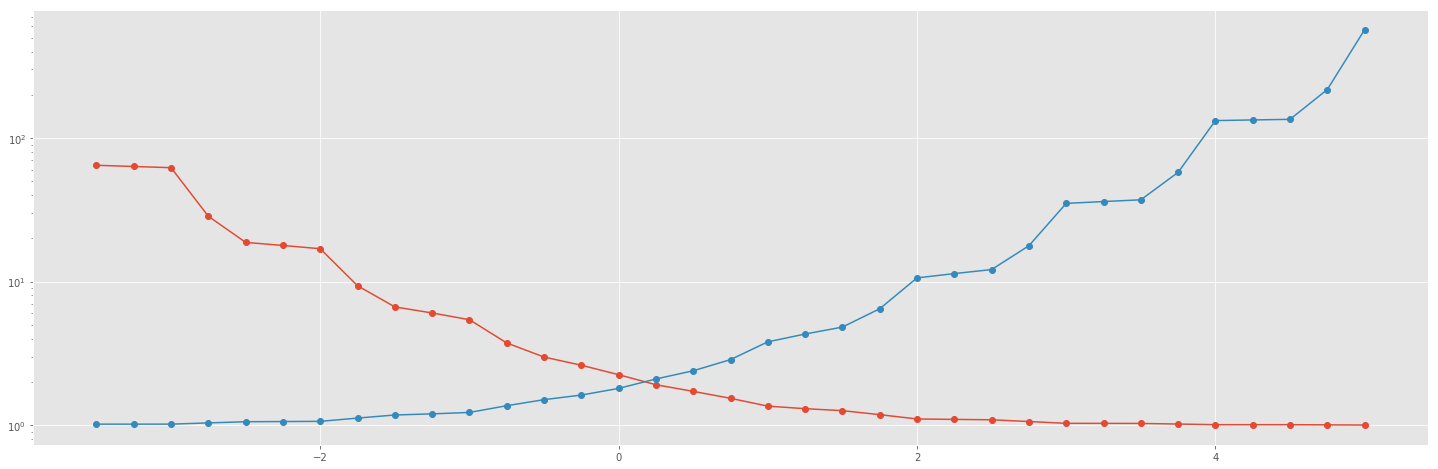

In [376]:
# odds dynamic
plt.figure(figsize=(25,8))

df_odds = pd.DataFrame.from_dict([odds])

to_cols = [x for x in df_odds.columns.tolist() if 'HDP1' in x]
tu_cols = [x for x in df_odds.columns.tolist() if 'HDP2' in x]

df_odds_1 = df_odds.loc[0, to_cols].T.reset_index()
df_odds_1['index'] = df_odds_1['index'].apply(lambda x: float(x.split(' ')[1]))
df_odds_1.sort_values('index', inplace=True)

plt.plot(df_odds_1['index'], df_odds_1[0], '-o')

df_odds_2 = df_odds.loc[0, tu_cols].T.reset_index()
df_odds_2['index'] = df_odds_2['index'].apply(lambda x: -1*float(x.split(' ')[1]))
df_odds_2.sort_values('index', inplace=True)

plt.plot(df_odds_2['index'], df_odds_2[0], '-o')
plt.yscale('log')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

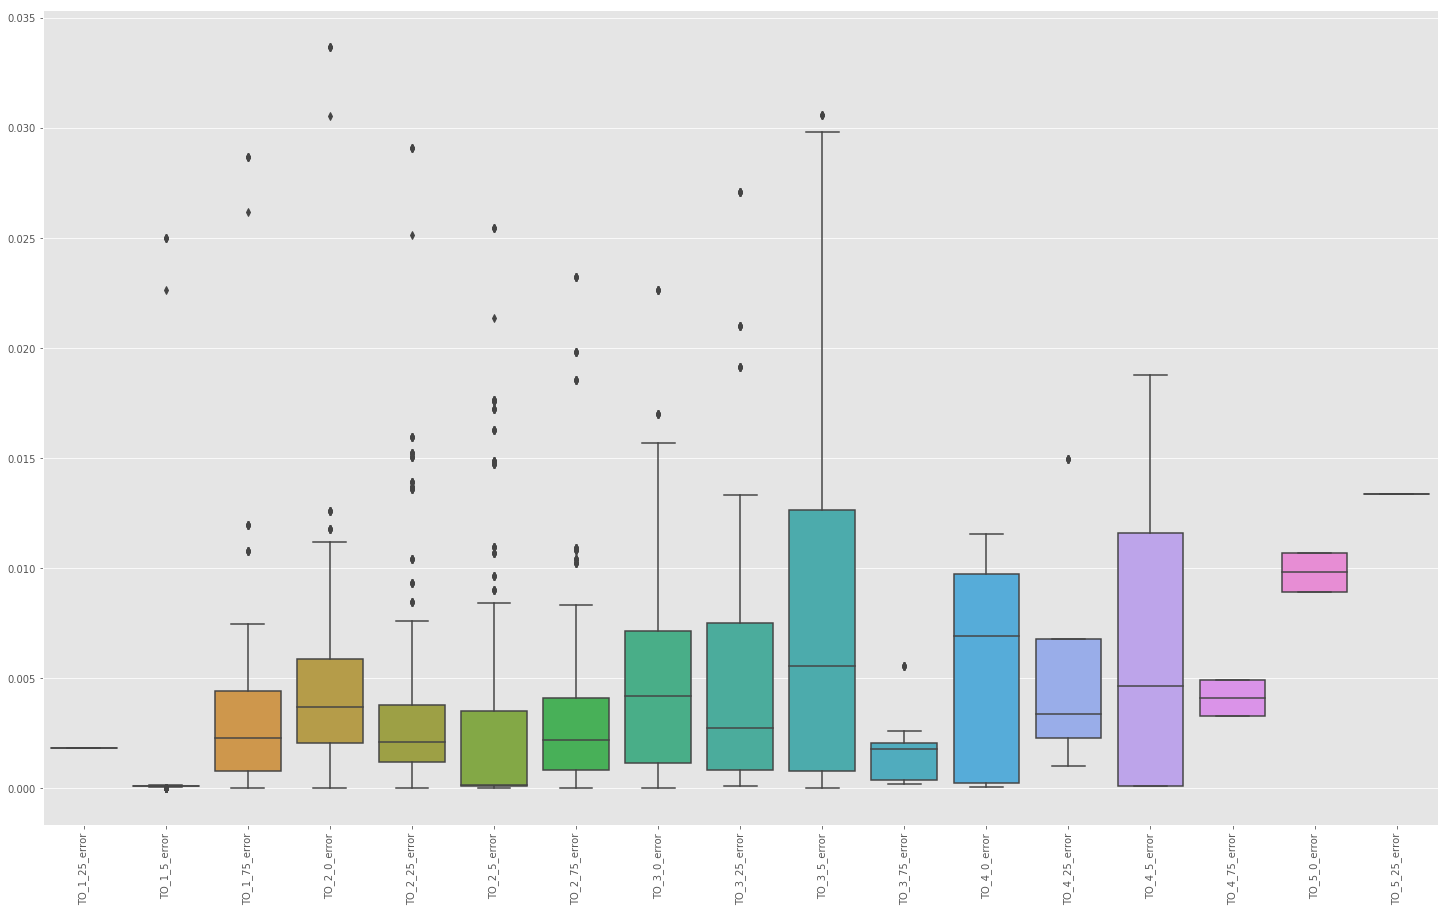

In [458]:
plt.figure(figsize=(25, 15))
sns.boxplot(
    data=(
        model_errors
        .loc[:, sorted([x for x in total_error_columns if 'TO' in x])]         
    ), 
    orient='v'
)
plt.xticks(rotation=90)

HOME_HDP -0,25_error    672
HOME_HDP -0,5_error     738
HOME_HDP -0,75_error    529
HOME_HDP -1,0_error     390
HOME_HDP -1,25_error    259
HOME_HDP -1,5_error     374
HOME_HDP -2,0_error      55
HOME_HDP -2,25_error     40
HOME_HDP -2,5_error      44
HOME_HDP -2,75_error     11
HOME_HDP -3,0_error      22
HOME_HDP -3,25_error     22
HOME_HDP -3,5_error      22
HOME_HDP 0,0_error      611
HOME_HDP 0,25_error     473
HOME_HDP 0,5_error      451
HOME_HDP 0,75_error     165
HOME_HDP 1,0_error       88
HOME_HDP 1,5_error      165
HOME_HDP 1,75_error      44
HOME_HDP 2,0_error       33
HOME_HDP 2,5_error       11
HOME_HDP 2,75_error      11
dtype: int64

In [477]:
model_errors[model_errors['HOME_HDP -2,75_error'].notnull()]

,warning,k1,to,tu,margin_TL,k2,hdp1,hdp2,margin_HDP,HOME,HOME_fair,HOME_predicted,HOME_error,DRAW,DRAW_fair,DRAW_predicted,DRAW_error,AWAY,AWAY_fair,AWAY_predicted,AWAY_error,TO_2_25,TO_2_25_fair,TO_2_25_predicted,TO_2_25_error,TU_2_25,TU_2_25_fair,TU_2_25_predicted,TU_2_25_error,TO_2_5,TO_2_5_fair,TO_2_5_predicted,TO_2_5_error,TU_2_5,TU_2_5_fair,TU_2_5_predicted,TU_2_5_error,TO_2_75,TO_2_75_fair,TO_2_75_predicted,TO_2_75_error,TU_2_75,TU_2_75_fair,TU_2_75_predicted,TU_2_75_error,TO_3_0,TO_3_0_fair,TO_3_0_predicted,TO_3_0_error,TU_3_0,TU_3_0_fair,TU_3_0_predicted,TU_3_0_error,TO_3_25,TO_3_25_fair,TO_3_25_predicted,TO_3_25_error,TU_3_25,TU_3_25_fair,TU_3_25_predicted,TU_3_25_error,"HOME_HDP 0,0","HOME_HDP 0,0_fair","HOME_HDP 0,0_predicted","HOME_HDP 0,0_error","AWAY_HDP 0,0","AWAY_HDP 0,0_fair","AWAY_HDP 0,0_predicted","AWAY_HDP 0,0_error","HOME_HDP -0,25","HOME_HDP -0,25_fair","HOME_HDP -0,25_predicted","HOME_HDP -0,25_error","AWAY_HDP 0,25","AWAY_HDP 0,25_fair","AWAY_HDP 0,25_predicted","AWAY_HDP 0,25_error","HOME_HDP -0,5","HOME_HDP -0,5_fair","HOME_HDP -0,5_predicted","HOME_HDP -0,5_error","AWAY_HDP 0,5","AWAY_HDP 0,5_fair","AWAY_HDP 0,5_predicted","AWAY_HDP 0,5_error","HOME_HDP -0,75","HOME_HDP -0,75_fair","HOME_HDP -0,75_predicted","HOME_HDP -0,75_error","AWAY_HDP 0,75","AWAY_HDP 0,75_fair","AWAY_HDP 0,75_predicted","AWAY_HDP 0,75_error","HOME_HDP -1,0","HOME_HDP -1,0_fair","HOME_HDP -1,0_predicted","HOME_HDP -1,0_error","AWAY_HDP 1,0","AWAY_HDP 1,0_fair","AWAY_HDP 1,0_predicted",...,"AWAY_HDP 3,5","AWAY_HDP 3,5_fair","AWAY_HDP 3,5_predicted","AWAY_HDP 3,5_error","HOME_HDP -1,25","HOME_HDP -1,25_fair","HOME_HDP -1,25_predicted","HOME_HDP -1,25_error","AWAY_HDP 1,25","AWAY_HDP 1,25_fair","AWAY_HDP 1,25_predicted","AWAY_HDP 1,25_error","HOME_HDP -1,5","HOME_HDP -1,5_fair","HOME_HDP -1,5_predicted","HOME_HDP -1,5_error","AWAY_HDP 1,5","AWAY_HDP 1,5_fair","AWAY_HDP 1,5_predicted","AWAY_HDP 1,5_error",TO_1_5,TO_1_5_fair,TO_1_5_predicted,TO_1_5_error,TU_1_5,TU_1_5_fair,TU_1_5_predicted,TU_1_5_error,"HOME_HDP 0,5","HOME_HDP 0,5_fair","HOME_HDP 0,5_predicted","HOME_HDP 0,5_error","AWAY_HDP -0,5","AWAY_HDP -0,5_fair","AWAY_HDP -0,5_predicted","AWAY_HDP -0,5_error","HOME_HDP 1,5","HOME_HDP 1,5_fair","HOME_HDP 1,5_predicted","HOME_HDP 1,5_error","AWAY_HDP -1,5","AWAY_HDP -1,5_fair","AWAY_HDP -1,5_predicted","AWAY_HDP -1,5_error","HOME_HDP 1,0","HOME_HDP 1,0_fair","HOME_HDP 1,0_predicted","HOME_HDP 1,0_error","AWAY_HDP -1,0","AWAY_HDP -1,0_fair","AWAY_HDP -1,0_predicted","AWAY_HDP -1,0_error","HOME_HDP -2,0","HOME_HDP -2,0_fair","HOME_HDP -2,0_predicted","HOME_HDP -2,0_error","AWAY_HDP 2,0","AWAY_HDP 2,0_fair","AWAY_HDP 2,0_predicted","AWAY_HDP 2,0_error","HOME_HDP -2,25","HOME_HDP -2,25_fair","HOME_HDP -2,25_predicted","HOME_HDP -2,25_error","AWAY_HDP 2,25","AWAY_HDP 2,25_fair","AWAY_HDP 2,25_predicted","AWAY_HDP 2,25_error","HOME_HDP -2,5","HOME_HDP -2,5_fair","HOME_HDP -2,5_predicted","HOME_HDP -2,5_error","AWAY_HDP 2,5","AWAY_HDP 2,5_fair","AWAY_HDP 2,5_predicted","AWAY_HDP 2,5_error","HOME_HDP 0,75","HOME_HDP 0,75_fair","HOME_HDP 0,75_predicted","HOME_HDP 0,75_error","AWAY_HDP -0,75","AWAY_HDP -0,75_fair","AWAY_HDP -0,75_predicted","AWAY_HDP -0,75_error",TO_1_25,TO_1_25_fair,TO_1_25_predicted,TO_1_25_error,TU_1_25,TU_1_25_fair,TU_1_25_predicted,TU_1_25_error,TO_0_5,TO_0_5_fair,TO_0_5_predicted,TO_0_5_error,TU_0_5,TU_0_5_fair,TU_0_5_predicted,TU_0_5_error
4,0.0,4.5,1.8,2.01,0.050394,-3.5,2.19,1.68,0.049302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.68,1.767123,1.76771,0.000188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [462]:
model_errors.loc[:, sorted([x for x in hdp_error_columns if 'HOME' in x])].median(axis=0)

HOME_HDP -0,25_error    0.008231
HOME_HDP -0,5_error     0.000250
HOME_HDP -0,75_error    0.005764
HOME_HDP -1,0_error     0.016262
HOME_HDP -1,25_error    0.015466
HOME_HDP -1,5_error     0.011520
HOME_HDP -2,0_error     0.001767
HOME_HDP -2,25_error    0.002432
HOME_HDP -2,5_error     0.004879
HOME_HDP -2,75_error    0.011639
HOME_HDP -3,0_error     0.007560
HOME_HDP -3,25_error    0.003004
HOME_HDP -3,5_error     0.000179
HOME_HDP 0,0_error      0.015807
HOME_HDP 0,25_error     0.007592
HOME_HDP 0,5_error      0.000218
HOME_HDP 0,75_error     0.001926
HOME_HDP 1,0_error      0.002598
HOME_HDP 1,5_error      0.000142
HOME_HDP 1,75_error     0.003003
HOME_HDP 2,0_error      0.010174
HOME_HDP 2,5_error      0.000141
HOME_HDP 2,75_error     0.004475
dtype: float64

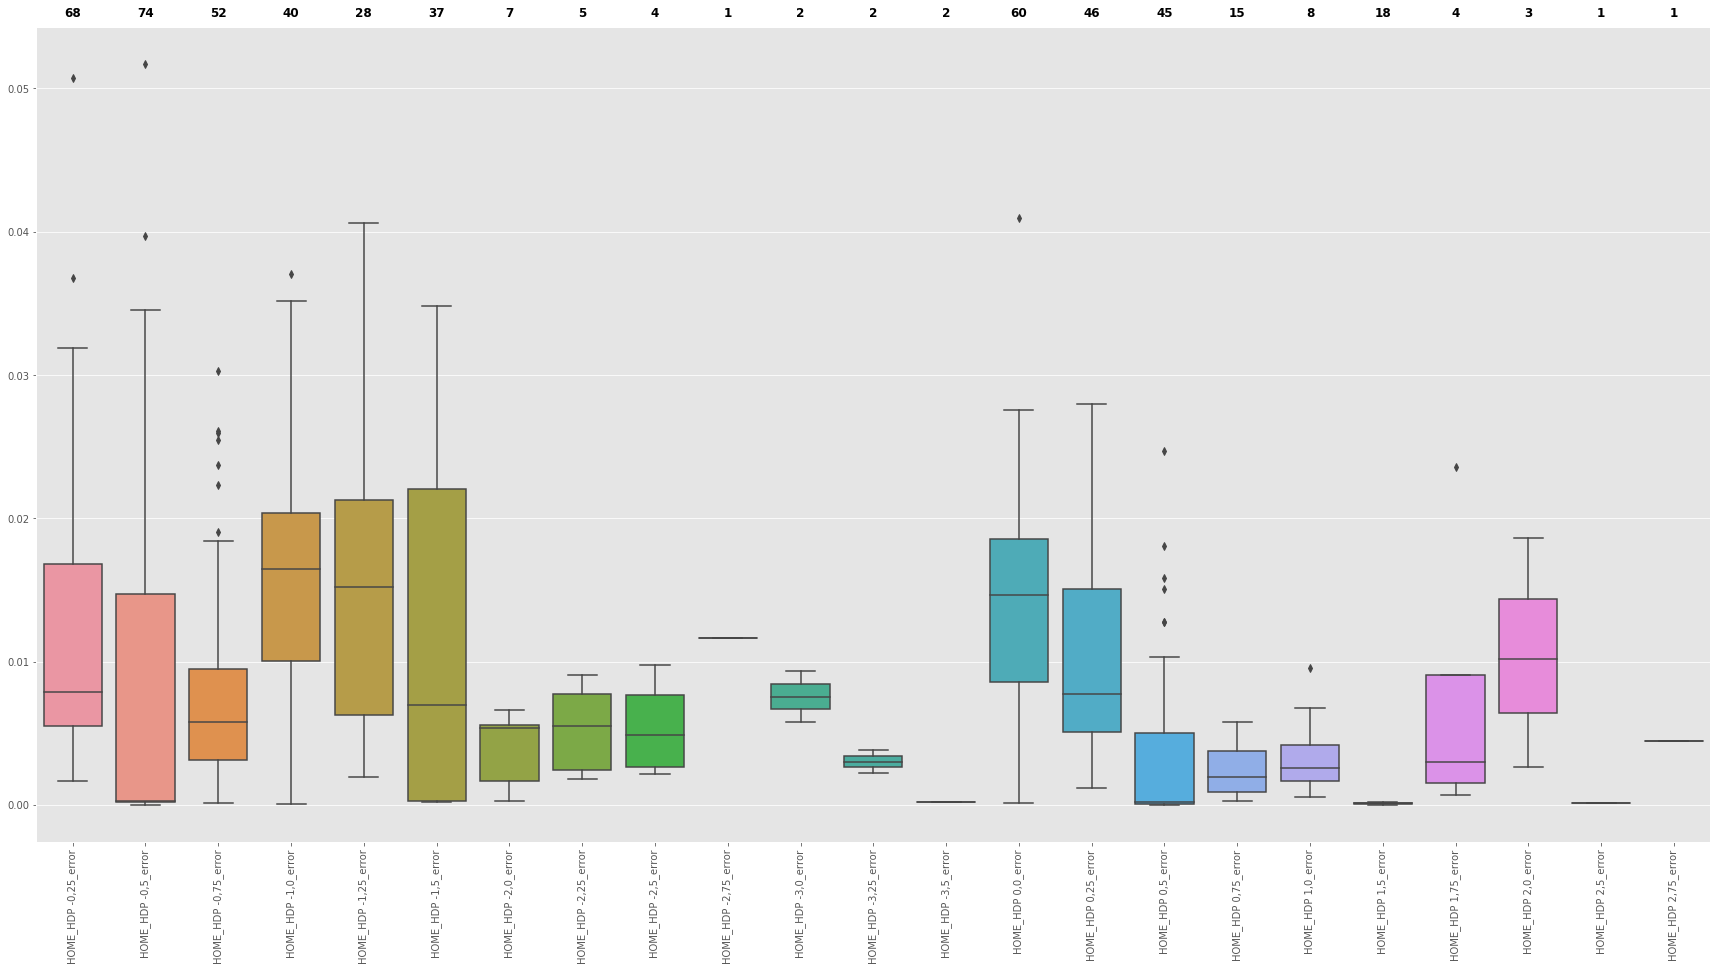

In [481]:
plt.figure(figsize=(30, 15))
plt_cols = sorted([x for x in hdp_error_columns if 'HOME' in x])
ax = sns.boxplot(
                 data=(
                    model_errors.loc[:, plt_cols]
                 ),orient='v'
)

nobs = model_errors.loc[:, sorted([x for x in hdp_error_columns if 'HOME' in x])].count(axis=0).values
medians = model_errors.loc[:, sorted([x for x in hdp_error_columns if 'HOME' in x])].median(axis=0).values
 
# Add it to the plot
pos = range(len(plt_cols))

for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], 0.055, nobs[tick],
    horizontalalignment='center', size='large', color='k', weight='semibold')

plt.xticks(rotation=90)
plt.show()

In [449]:
model_errors[model_errors['warning'] == 1].head()

,warning,k1,to,tu,margin_TL,k2,hdp1,hdp2,margin_HDP,HOME,HOME_fair,HOME_predicted,HOME_error,DRAW,DRAW_fair,DRAW_predicted,DRAW_error,AWAY,AWAY_fair,AWAY_predicted,AWAY_error,TO_2_25,TO_2_25_fair,TO_2_25_predicted,TO_2_25_error,TU_2_25,TU_2_25_fair,TU_2_25_predicted,TU_2_25_error,TO_2_5,TO_2_5_fair,TO_2_5_predicted,TO_2_5_error,TU_2_5,TU_2_5_fair,TU_2_5_predicted,TU_2_5_error,TO_2_75,TO_2_75_fair,TO_2_75_predicted,TO_2_75_error,TU_2_75,TU_2_75_fair,TU_2_75_predicted,TU_2_75_error,TO_3_0,TO_3_0_fair,TO_3_0_predicted,TO_3_0_error,TU_3_0,TU_3_0_fair,TU_3_0_predicted,TU_3_0_error,TO_3_25,TO_3_25_fair,TO_3_25_predicted,TO_3_25_error,TU_3_25,TU_3_25_fair,TU_3_25_predicted,TU_3_25_error,"HOME_HDP 0,0","HOME_HDP 0,0_fair","HOME_HDP 0,0_predicted","HOME_HDP 0,0_error","AWAY_HDP 0,0","AWAY_HDP 0,0_fair","AWAY_HDP 0,0_predicted","AWAY_HDP 0,0_error","HOME_HDP -0,25","HOME_HDP -0,25_fair","HOME_HDP -0,25_predicted","HOME_HDP -0,25_error","AWAY_HDP 0,25","AWAY_HDP 0,25_fair","AWAY_HDP 0,25_predicted","AWAY_HDP 0,25_error","HOME_HDP -0,5","HOME_HDP -0,5_fair","HOME_HDP -0,5_predicted","HOME_HDP -0,5_error","AWAY_HDP 0,5","AWAY_HDP 0,5_fair","AWAY_HDP 0,5_predicted","AWAY_HDP 0,5_error","HOME_HDP -0,75","HOME_HDP -0,75_fair","HOME_HDP -0,75_predicted","HOME_HDP -0,75_error","AWAY_HDP 0,75","AWAY_HDP 0,75_fair","AWAY_HDP 0,75_predicted","AWAY_HDP 0,75_error","HOME_HDP -1,0","HOME_HDP -1,0_fair","HOME_HDP -1,0_predicted","HOME_HDP -1,0_error","AWAY_HDP 1,0","AWAY_HDP 1,0_fair","AWAY_HDP 1,0_predicted",...,"AWAY_HDP 3,5","AWAY_HDP 3,5_fair","AWAY_HDP 3,5_predicted","AWAY_HDP 3,5_error","HOME_HDP -1,25","HOME_HDP -1,25_fair","HOME_HDP -1,25_predicted","HOME_HDP -1,25_error","AWAY_HDP 1,25","AWAY_HDP 1,25_fair","AWAY_HDP 1,25_predicted","AWAY_HDP 1,25_error","HOME_HDP -1,5","HOME_HDP -1,5_fair","HOME_HDP -1,5_predicted","HOME_HDP -1,5_error","AWAY_HDP 1,5","AWAY_HDP 1,5_fair","AWAY_HDP 1,5_predicted","AWAY_HDP 1,5_error",TO_1_5,TO_1_5_fair,TO_1_5_predicted,TO_1_5_error,TU_1_5,TU_1_5_fair,TU_1_5_predicted,TU_1_5_error,"HOME_HDP 0,5","HOME_HDP 0,5_fair","HOME_HDP 0,5_predicted","HOME_HDP 0,5_error","AWAY_HDP -0,5","AWAY_HDP -0,5_fair","AWAY_HDP -0,5_predicted","AWAY_HDP -0,5_error","HOME_HDP 1,5","HOME_HDP 1,5_fair","HOME_HDP 1,5_predicted","HOME_HDP 1,5_error","AWAY_HDP -1,5","AWAY_HDP -1,5_fair","AWAY_HDP -1,5_predicted","AWAY_HDP -1,5_error","HOME_HDP 1,0","HOME_HDP 1,0_fair","HOME_HDP 1,0_predicted","HOME_HDP 1,0_error","AWAY_HDP -1,0","AWAY_HDP -1,0_fair","AWAY_HDP -1,0_predicted","AWAY_HDP -1,0_error","HOME_HDP -2,0","HOME_HDP -2,0_fair","HOME_HDP -2,0_predicted","HOME_HDP -2,0_error","AWAY_HDP 2,0","AWAY_HDP 2,0_fair","AWAY_HDP 2,0_predicted","AWAY_HDP 2,0_error","HOME_HDP -2,25","HOME_HDP -2,25_fair","HOME_HDP -2,25_predicted","HOME_HDP -2,25_error","AWAY_HDP 2,25","AWAY_HDP 2,25_fair","AWAY_HDP 2,25_predicted","AWAY_HDP 2,25_error","HOME_HDP -2,5","HOME_HDP -2,5_fair","HOME_HDP -2,5_predicted","HOME_HDP -2,5_error","AWAY_HDP 2,5","AWAY_HDP 2,5_fair","AWAY_HDP 2,5_predicted","AWAY_HDP 2,5_error","HOME_HDP 0,75","HOME_HDP 0,75_fair","HOME_HDP 0,75_predicted","HOME_HDP 0,75_error","AWAY_HDP -0,75","AWAY_HDP -0,75_fair","AWAY_HDP -0,75_predicted","AWAY_HDP -0,75_error",TO_1_25,TO_1_25_fair,TO_1_25_predicted,TO_1_25_error,TU_1_25,TU_1_25_fair,TU_1_25_predicted,TU_1_25_error,TO_0_5,TO_0_5_fair,TO_0_5_predicted,TO_0_5_error,TU_0_5,TU_0_5_fair,TU_0_5_predicted,TU_0_5_error
1,1.0,3.5,1.751,2.080,0.049313,2.5,1.735,2.130,0.043842,17.47,18.567775,17.05017,0.004794,8.87,9.427370,9.31179,0.001317,1.120,1.190378,1.19910,0.006110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.581,1.664286,1.65675,0.002733,2.380,2.505376,2.52264,0.002732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,